Group 2220:  
Daniel Jordan  
Jake Jackson  
Thevan Pasupathipillai  
Marco Lorenzetti   

# Investigation of Data Deprivation, Data Augmentation and Complexity of a Deep Neural Network when applied to a Binary Classification Problem

key words: Artifical Intelegence, Machine Learning, Deep Learning, Neural Network, Binary Classification, Grid Search, Data Augmentation

# Introduction

A deep neural network(DNN) is trained on a binary
classification problem. It is then optimised using a grid
search over multiple hyper parameters. The ability of the
model to learn the problem when deprived of data is in-
vestigated. The technique of data augmentation is used
as a possible solution to data deprivation. To further in-
vestigate the performances of the DNN, it is trained on a
more complex data-set. The complexity of the network is
then simplified while maintaining the same performance.

## Generate Data

Data point co-ordinates are generated following a uniform distribution from -50 to +50. Four thousand points are generated.

They are labled 1 if the positions satisfy all three boundary conditions, and 0 otherwise.  
$x_1 > -20$  
$x_2 > -40$  
$x_1 + x_2 < 40$



mkdir: cannot create directory ‘DATA’: File exists
Number of Points Inside the Triangle 1821.0
Number of Points Outside the Triangle 2179.0
Fraction of Points Inside the Triangle 0.45525


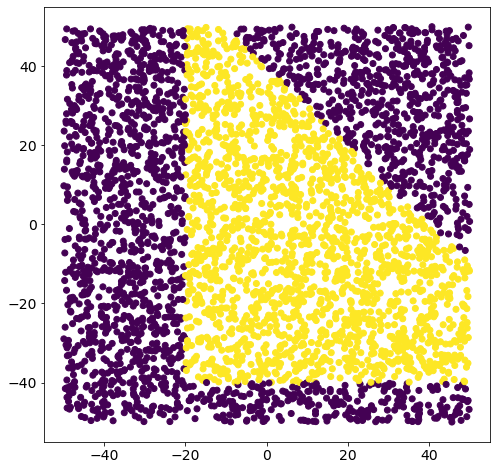

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import tensorflow as tf
import os

# a nonlinear function of a 2d array x
def f(x):
    r=0
    if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
      r=1
    return r

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

# random seed for reproducibility
np.random.seed(12345)
x,y = (np.random.uniform(-50,50,size = (N,2)), np.zeros(N))
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i])
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

print('Number of Points Inside the Triangle',sum(y))
print('Number of Points Outside the Triangle',N-sum(y))
print('Fraction of Points Inside the Triangle',sum(y)/N)

N = len(x)
# training data
perc_train = 0.8
N_train = int(perc_train * N)



### Split Training and Validation Data

The data is split 80:10 for training and validation. The validation data is used during training to check performance and if overfitting is present. 

In [6]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

The data is scaled to have values form -1 to 1. This makes the model easier to train. The weights will have similar values. This avoids any accidental favouring of a particular weight.

In [7]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define an initial model with Keras

In [8]:
def compile_model(optimizer='adam',activation='relu', neurons=20, dropout_rate=0.2, hidden_layers=2, loss_fun = 'binary_crossentropy'):
    #definition of the architecture
    L=2 #size of input data points
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))
    initial = tf.keras.initializers.RandomNormal(mean = 0., stddev = 1., seed = 12345)
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation,kernel_initializer = initial))
        model.add(Dropout(dropout_rate))    
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss=loss_fun,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


## Training and Performance Check 400 epochs

This is a first look into the performance of the neural network. At each epoch the accuracy is calculated from the trianing and validation data. This is plotted below.

The best performance test of the model is to plot it's predictions throughout the entire sample space. A grid of points are chosen to represent the entire sample space. The result of each prediction is shown in color. A prediction close to one is yellow and indicates the model thinks the point is within the boundaries. The opposite prediction is purple. There is a gradient colour scale to show the degree of the models indecision.



In [9]:
nepochs = 400
# training the model
model = compile_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = os.getcwd(),
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose = 0)
fit = model.fit(x_train, y_train,
              epochs = nepochs, batch_size = 50,
              validation_data=(x_valid,y_valid),
              verbose=0, callbacks=[model_checkpoint_callback])

INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written to: /content/assets
INFO:tensorflow:Assets written 

The best valadation accuracy, 0.9884374737739563 , was acheved on the 382 th epoch.


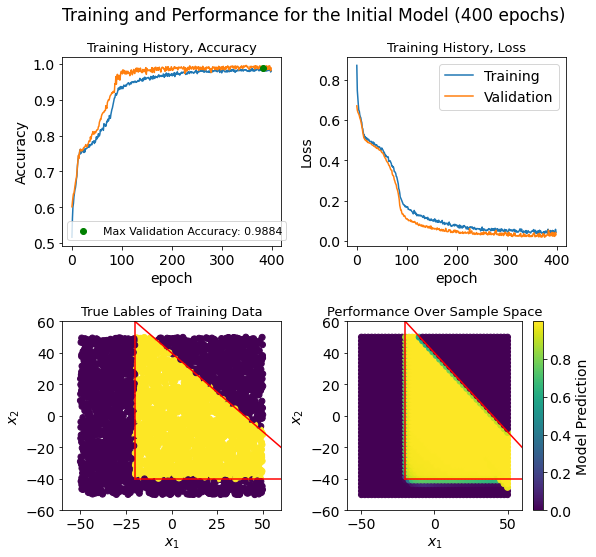

In [10]:
#defining a gid to represent the sample space
dX = 2 #number of dimensions of the data
LG = int(np.sqrt(4000/2))
x1 = np.linspace(-50,50,LG)
x2 = np.linspace(-50,50,LG)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(x1[j],x2[i])
        k=k+1
#rescaling grid points
grid_r = grid/50
#performing a prediction on grid points
pred = model.predict(grid_r)


plt.rcParams['font.size'] = 14
max_val_acc = np.max(fit.history['accuracy'])
max_val_epoch = np.argmax(fit.history['accuracy'])
print('The best valadation accuracy,',max_val_acc,', was acheved on the',max_val_epoch,'th epoch.')

#plot perfomance vs epochs
fig,AX=plt.subplots(2,2,figsize=(7,7))
fig.suptitle('Training and Performance for the Initial Model (400 epochs)', y=1, fontsize=17)
ax=AX[0][0]
ax.set_title('Training History, Accuracy',fontsize = 13)
mystring = "Max Validation Accuracy: "+str(round(max_val_acc,4))
ax.scatter(max_val_epoch,max_val_acc, color = 'g', label = mystring, zorder = 10)
ax.plot(fit.history['accuracy'])
ax.plot(fit.history['val_accuracy'])
ax.legend(fontsize = 11)
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")

ax=AX[0][1]
ax.set_title('Training History, Loss',fontsize = 13)
ax.plot(fit.history['loss'],label="Training")
ax.plot(fit.history['val_loss'],label="Validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

def boundaries():    
    ax.plot((-20,-20),(-40,60),c="r")
    ax.plot((-20,80),(-40,-40),c="r")
    ax.plot((-20,80),(60,-40),c="r")
ax=AX[1][0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title('True Lables of Training Data',fontsize = 13)
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
boundaries()
ax=AX[1][1]
col = ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title('Performance Over Sample Space',fontsize = 13)
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(col, label ='Model Prediction')
boundaries()
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=0.90, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()


## Balancing Accuracy and Computation Time

Performing a grid search is computationally intesive. To summarise, a grid search trains the model with different hyperparameters and compairs their accuracy scores after training. The less epochs used for each training means the grid search is less computationally intensive. If there are not enough epochs then the model isn't trained to any significant degree of accuracy. The best pararameter might not be revealed.

The following code finds the lowest number of epochs required to train the initial model to an accuracy of 0.9 on the validation data.

This number of epochs is unique to this Neural Network. Although it is a good indication of what it might be for the similar structures being tested. For this reason 20 additional epochs are added for the grid search. This increases the chance the model is trained to an adequate level for hyper parameter selection during the grid search. There is no problem doing this so long as the run time is feasible.

The perfomance of this model is then checked like before. A prediction is made over the same grid of points that represent the entire sample space.

In [11]:
## find number of epoch that gives the target_acc accuracy
val_acc = fit.history['val_accuracy']
ep = 0
optimal_epoch = 0
acc = 0
target_acc = 0.9

while acc <= target_acc and ep < nepochs-1:
  ep += 1
  acc = val_acc[ep]
  if acc >= target_acc:
    optimal_epoch = ep

print('The minimum number of epochs required to gain an accuracy of',target_acc,'is,', optimal_epoch,'epochs')

nepochs = optimal_epoch+20

print("\nDuring the grid search each tesed parameter combination will be trained for",nepochs,"epochs.")
    

The minimum number of epochs required to gain an accuracy of 0.9 is, 75 epochs

During the grid search each tesed parameter combination will be trained for 95 epochs.


## Hyper Parameter Optimisation

A grid search is used to optimise the hyper parameters. As mentioned before this is computationally intensive. This intensity explodes as the number of parameters in the search grid increases. This is why only 'grids' of one parameter will be searched. The best values for the parameter is kept and the model altered. Then the grid for the next parameter is searched. This method misses many grid points that would be present in a full grid search. Thus it is less than ideal. Although it is all that is feasable.

After the parameters are optimised once, the model is placed in the same grid searches again. The hope being that there might be a better value for a parameter now that the others have been optimised. The twice optimised model is tested and preformances are reported.
  
*Given more time our group would look into running each grid point in parralell on a high performance GPU.*

In [12]:
from sklearn.model_selection import GridSearchCV #skit leatn grid search function
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier #Wrapper to turn a keras NN into a scikit learn NN so gridsearchCV can be used/

# list of allowed optional arguments for the optimizer, see `compile_model()`
hidden_layers = [1, 2, 4, 8]
layer_size = [2,5,10,20]
act_functions = ['relu', 'sigmoid', 'elu', 'softsign']
drop_percs = [0, 0.2, 0.4, 0.8]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# define parameter dictionaries
hidden_grid = dict(hidden_layers=hidden_layers) 
neuron_grid = dict(neurons=layer_size)
activation_grid = dict(activation=act_functions)
dropout_grid = dict(dropout_rate = drop_percs)
optimizer_grid = dict(optimizer=optimizer)

#oneSearch is a method that will perform a grid search on one hyper parameter whilst the others stay constant.
#It returns a parameter dictionary updated with the new best value for the parameter searched
paramDef = dict(optimizer=tf.keras.optimizers.Adam(),activation='relu', neurons=20, dropout_rate=0.2, hidden_layers=2)
def oneSearch(paramTest, paramIn = paramDef):
  #keras to scikit learn wrapper
  model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=nepochs,
                        batch_size=50, 
                        verbose=0,
                        optimizer = paramIn['optimizer'],
                        activation = paramIn['activation'],
                        neurons = paramIn['neurons'],
                        dropout_rate = paramIn['dropout_rate'],
                        hidden_layers = paramIn['hidden_layers'],
                        )
  
  grid = GridSearchCV(estimator=model_gridsearch, param_grid=paramTest, n_jobs=1, cv=4)
  grid_result = grid.fit(x_train,y_train)    
  # summarize results
  print("\n\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))
  #return the best parameter
  bestParam = list(grid_result.best_params_.values())[0]
  newParam = paramIn
  newParam[list(paramTest.keys())[0]] = bestParam
  
  return newParam

#groupSearch is a function that will perform a grid search over each hyper parameter.
#It starts from the parameter dictionaty given and returns a dictionary of the best found values for the parameters.
def groupSearch(param = paramDef):  
  newParam = oneSearch(hidden_grid, paramIn = param)
  newParam = oneSearch(neuron_grid, paramIn = newParam)
  newParam = oneSearch(activation_grid, paramIn = newParam)
  newParam = oneSearch(dropout_grid, paramIn = newParam)
  newParam = oneSearch(optimizer_grid, paramIn = newParam)
  return newParam

param1Search = groupSearch()
print('\nThe best parameters found after doing a grid search over each parameter, one parameter at a time.\n',
       'i.e. The once optimized parameters:' ,param1Search)
param2Search = groupSearch(param1Search)
print('\nThe best parameters found after repeating the grid search starting from the previous parameters.\n',
       'i.e. The twice optimized parameters:', param2Search)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.926250 using {'hidden_layers': 2}
0.891875 (0.057802) with: {'hidden_layers': 1}
0.926250 (0.007016) with: {'hidden_layers': 2}
0.817500 (0.068368) with: {'hidden_layers': 4}
0.737812 (0.109460) with: {'hidden_layers': 8}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.929062 using {'neurons': 20}
0.686875 (0.150264) with: {'neurons': 2}
0.897188 (0.035038) with: {'neurons': 5}
0.888125 (0.050284) with: {'neurons': 10}
0.929062 (0.006636) with: {'neurons': 20}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.933438 using {'activation': 'elu'}
0.859688 (0.081040) with: {'activation': 'relu'}
0.805313 (0.057875) with: {'activation': 'sigmoid'}
0.933438 (0.015572) with: {'activation': 'elu'}
0.922188 (0.021239) with: {'activation': 'softsign'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.985313 using {'dropout_rate': 0}
0.985313 (0.003789) with: {'dropout_rate': 0}
0.923437 (0.005888) with: {'dropout_rate': 0.2}
0.918437 (0.008495) with: {'dropout_rate': 0.4}
0.739688 (0.016803) with: {'dropout_rate': 0.8}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.991250 using {'optimizer': 'Nadam'}
0.963750 (0.014497) with: {'optimizer': 'SGD'}
0.986875 (0.004550) with: {'optimizer': 'RMSprop'}
0.792188 (0.050786) with: {'optimizer': 'Adagrad'}
0.409062 (0.049579) with: {'optimizer': 'Adadelta'}
0.984063 (0.004951) with: {'optimizer': 'Adam'}
0.976875 (0.007781) with: {'optimizer': 'Adamax'}
0.991250 (0.003536) with: {'optimizer': 'Nadam'}

The best parameters found after doing a grid search over each parameter, one parameter at a time.
 i.e. The once optimized parameters: {'optimizer': 'Nadam', 'activation': 'elu', 'neurons': 20, 'dropout_rate': 0, 'hidden_layers': 2}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.989375 using {'hidden_layers': 4}
0.929375 (0.021186) with: {'hidden_layers': 1}
0.986563 (0.008167) with: {'hidden_layers': 2}
0.989375 (0.006156) with: {'hidden_layers': 4}
0.968125 (0.006760) with: {'hidden_layers': 8}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.991562 using {'neurons': 10}
0.874687 (0.078578) with: {'neurons': 2}
0.986250 (0.007552) with: {'neurons': 5}
0.991562 (0.001849) with: {'neurons': 10}
0.987812 (0.003466) with: {'neurons': 20}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.990625 using {'activation': 'elu'}
0.950938 (0.036714) with: {'activation': 'relu'}
0.802500 (0.054285) with: {'activation': 'sigmoid'}
0.990625 (0.004550) with: {'activation': 'elu'}
0.986562 (0.001849) with: {'activation': 'softsign'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.989375 using {'dropout_rate': 0}
0.989375 (0.004550) with: {'dropout_rate': 0}
0.893438 (0.045358) with: {'dropout_rate': 0.2}
0.753437 (0.019312) with: {'dropout_rate': 0.4}
0.537187 (0.028012) with: {'dropout_rate': 0.8}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Best: 0.990625 using {'optimizer': 'RMSprop'}
0.977812 (0.004086) with: {'optimizer': 'SGD'}
0.990625 (0.004193) with: {'optimizer': 'RMSprop'}
0.818438 (0.050299) with: {'optimizer': 'Adagrad'}
0.539375 (0.087431) with: {'optimizer': 'Adadelta'}
0.990625 (0.006027) with: {'optimizer': 'Adam'}
0.979687 (0.007467) with: {'optimizer': 'Adamax'}
0.989375 (0.001875) with: {'optimizer': 'Nadam'}

The best parameters found after repeating the grid search starting from the previous parameters.
 i.e. The twice optimized parameters: {'optimizer': 'RMSprop', 'activation': 'elu', 'neurons': 10, 'dropout_rate': 0, 'hidden_layers': 4}


## Optimised Parameters Found for Neural Network

In [17]:
print('\nThe best parameters found for the twice optimised neural network model:\n',param2Search)


The best parameters found for the twice optimised neural network model:
 {'optimizer': 'RMSprop', 'activation': 'elu', 'neurons': 10, 'dropout_rate': 0, 'hidden_layers': 4}


## Testing the Performance of the Twice Optimised Neural Network Model

In [18]:
#The keras model is altered to accept a dictionary of parameters. This way param2Search can be inserted as is
def compile_modelP(param):
    model = compile_model(optimizer=param['optimizer'],activation=param['activation'], neurons=param['neurons'], dropout_rate=param['dropout_rate'], hidden_layers=param['hidden_layers'])
    return model

#define and train new model
newModel = compile_modelP(param2Search)
nepochs = 400
fit = newModel.fit(x_train, y_train,
                      epochs = nepochs, batch_size = 50,
                      validation_data=(x_valid,y_valid),
                      verbose=0, callbacks=[model_checkpoint_callback])

INFO:tensorflow:Assets written to: /content/assets


The best valadation accuracy, 0.995312511920929 , was acheved on the 373 th epoch.


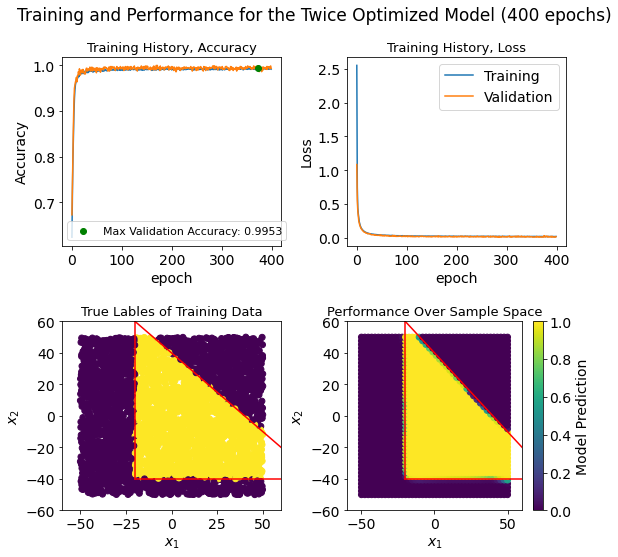


The best parameters found for the twice optimised neural network model:
 {'optimizer': 'RMSprop', 'activation': 'elu', 'neurons': 10, 'dropout_rate': 0, 'hidden_layers': 4}


In [19]:
#performing a prediction on grid points
pred = newModel.predict(grid_r)

plt.rcParams['font.size'] = 14
max_val_acc = np.max(fit.history['accuracy'])
max_val_epoch = np.argmax(fit.history['accuracy'])
print('The best valadation accuracy,',max_val_acc,', was acheved on the',max_val_epoch,'th epoch.')

#plot perfomance vs epochs
fig,AX=plt.subplots(2,2,figsize=(7,7))
fig.suptitle('Training and Performance for the Twice Optimized Model (400 epochs)', y=1, fontsize=17)
ax=AX[0][0]
ax.set_title('Training History, Accuracy',fontsize = 13)
mystring = "Max Validation Accuracy: "+str(round(max_val_acc,4))
ax.scatter(max_val_epoch,max_val_acc, color = 'g', label = mystring, zorder = 10)
ax.plot(fit.history['accuracy'])
ax.plot(fit.history['val_accuracy'])
ax.legend(fontsize = 11)
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")

ax=AX[0][1]
ax.set_title('Training History, Loss',fontsize = 13)
ax.plot(fit.history['loss'],label="Training")
ax.plot(fit.history['val_loss'],label="Validation")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

def boundaries():    
    ax.plot((-20,-20),(-40,60),c="r")
    ax.plot((-20,80),(-40,-40),c="r")
    ax.plot((-20,80),(60,-40),c="r")
ax=AX[1][0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title('True Lables of Training Data',fontsize = 13)
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
boundaries()
ax=AX[1][1]
col = ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title('Performance Over Sample Space',fontsize = 13)
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(col, label ='Model Prediction')
boundaries()
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=0.90, 
                    wspace=0.3, 
                    hspace=0.4)
plt.show()

print('\nThe best parameters found for the twice optimised neural network model:\n',param2Search)

## Finding the Best Parameters
### (Multiple Runs Yeald Different Results)

The runs are yealding different results because of weight initalisation. The weights of the model are initalised randomly. In the keras model we assigned a seed so that they would be initalised the same on every run. Although when this is placed in the scikit learn wrapper the seed seaces to fucntion. Different initalisations lead to different accuracies when trained. The ranking of the parameter values in the grid can change. The best performing model in terms of accuracy was kept.



## The Best Performing Neural Network Architecture

After a few runs of making twice optimised models the best performing one is shown below.

Optimizer -> RMSprop  
Activation Function -> elu  
Neurons per Layer -> 20  
Dropout Rate -> 0  
Hidden Layers -> 4  

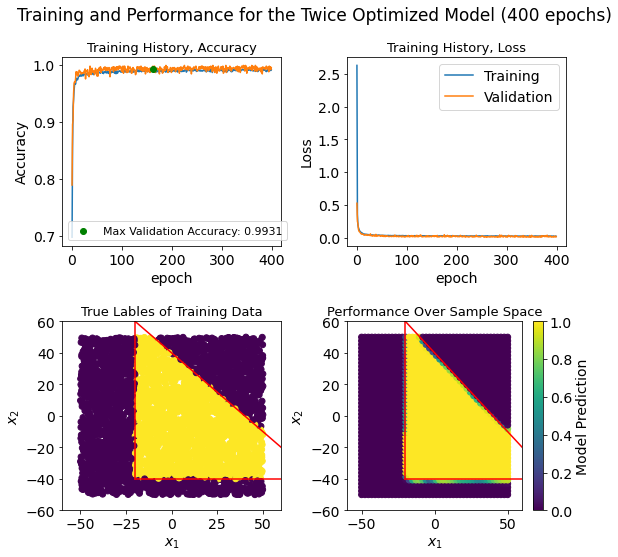

P.S. The most recent run was actually slightly better but the rest of the report is based on using the structure that provided these results. 

In [20]:
paramBest = dict(optimizer='RMSprop',activation='elu', neurons=20, dropout_rate=0, hidden_layers=4)
print('\nThe most recent twice optimised parameters:\n',param2Search)

print('\nThe best parameters found after multiple runs of the cells above for parameter optimisation.\n',paramBest)


The most recent twice optimised parameters:
 {'optimizer': 'RMSprop', 'activation': 'elu', 'neurons': 10, 'dropout_rate': 0, 'hidden_layers': 4}

The best parameters found after multiple runs of the cells above for parameter optimisation.
 {'optimizer': 'RMSprop', 'activation': 'elu', 'neurons': 20, 'dropout_rate': 0, 'hidden_layers': 4}


## DATA SIZE
In order to investigate the effect of data size on the
fit, a single large data set of 8000 points (4000 training,
4000 validation) was split into multiple smaller sections.
The model was subsequently independently trained on
each section. The accuracy of each model was measured
by the success of predicting the labels of the 4000 point
validation set. In addition, a linearly spaced grid of predicted values was plotted and overlaid with the input
data and the original distribution.

# Generate/load in a large data set of 8000 points 

In order to be able to see how adding more data points would affect the fit, the same data set was used for each run but expanded/shrank depending on the required size. In this way a direct comparison be made between the effects of data size on a smaller and larger fit.   

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

def filename(s,TYPE=1): #goes to sub folder data  #Type saves wasted data? 
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

def create_dataset(N):
  TYPE=1 #looks like just added to file name
  # random seed for reproducibility
  np.random.seed(12345)
  print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))# random seed test

  x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
  for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

  !mkdir DATA        
  np.savetxt(filename("data_size",N),x)
  np.savetxt(filename("data_size_labels",N),y,fmt="%d")

def load_dataset(N):          
  x = np.loadtxt(filename("data_size", N), delimiter = ' ')
  y = np.loadtxt(filename("data_size_labels", N), delimiter = ' ')
  return x, y
  
N = 8000
!mkdir DATA
# create_dataset(N)
x, y = load_dataset(N)

mkdir: cannot create directory ‘DATA’: File exists


# Set up the NN model to be trained
The neural network with the best parameters found via the prior grid search is used here 

In [ ]:
#############################definitions#############################
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

def compile_model(optimizer='RMSprop',activation='elu', neurons=20, dropout_rate=0, hidden_layers=4): #Daniel's Optimal model.
    L=2 #size of input data points
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))
    initial = tf.keras.initializers.RandomNormal(mean = 0., stddev = 1., seed = 12345)
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation,kernel_initializer = initial))
        model.add(Dropout(dropout_rate))
  
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',  #tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

def boundaries(): 
    ax.plot((-20,-20),(-40,60),c="r")
    ax.plot((-20,80),(-40,-40),c="r")
    ax.plot((-20,80),(60,-40),c="r")

############################# end defs #############################

# Run and investigate model on many data sizes.

The NN here is ran on trained on various data sizes the first 9 where the model is estabishing are plotted here showing the model prediction in space. 

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)
V= 4000 
v_scores = []
data_size = [2,5,10,20, 40, 50, 60, 80,100,120,150,200,500, 1000,1500,2000,2500,3000,3500,4000]
fig,AX=plt.subplots(3,3,figsize=(18,18))
R, C =0, 0

for N_train in data_size:

  (x_train, y_train) = (x[0:N_train],y[0:N_train])
  (x_valid, y_valid) = (x[len(x)-V:],y[len(x)-V:])  
  xp = x_train #need to preserve unscaled
  x_train = Rescale(x_train)
  x_valid = Rescale(x_valid)
  
  optModel = compile_model()
  fit = optModel.fit(x_train, y_train,
                        epochs = 300, batch_size = 50,
                        validation_data=(x_valid,y_valid),
                        verbose=0)
  
  loss, acc = optModel.evaluate(x=x_valid, y=y_valid, verbose = 0)
  v_scores.append(acc)
  print('Training data length:',len(x_train), ', Validation Length = ', len(x_valid),  ', Accuracy = ', acc  )
  
  #Plot the first 9 graphs in one large subplot
  if R <3 and C<3  : #only plot the first 9 where the cisulisation is useful   
    dX = 2 
    LG = int(np.sqrt(4000/2))
    x1 = np.linspace(-50,50,LG)
    x2 = np.linspace(-50,50,LG)
    grid = np.zeros((LG*LG,2))
    k=0
    for i in range(LG):
        for j in range(LG):
            grid[k,:]=(x1[j],x2[i])
            k=k+1

    grid_r = grid/50
    pred = optModel.predict(grid_r)

    tri_mask = [y_train==1]
    inv_tri_mask = [y_train!=1]
    ax=AX[C][R]

    t1 = ax.scatter(grid[:,0],grid[:,1],c=pred)
    ax.set_title('N =' + str(N_train) + ', Validation Accuracy = ' + str(round(acc,2)))
    boundaries()
    ax.scatter(xp[:,0][tri_mask],xp[:,1][tri_mask], c='red', label = 'Training data (y=1)')
    ax.scatter(xp[:,0][inv_tri_mask],xp[:,1][inv_tri_mask], c='white', label='Training data (y=0)')
    ax.set_xlim(-55,55)
    ax.set_ylim(-55,55)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set(adjustable='box', aspect='equal')
    if R==0 and C==0:# Only first graph has legend 
      ax.legend(facecolor='#aeadad', fontsize = 12)

    if R >1:# Graph matrix index 
      C+=1
      R=0
    else:
      R +=1
      
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.17, hspace=0.02)
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
fig.colorbar(t1, label ='Model Prediction', cax=cb_ax)
print(v_scores)

# Plot the accuracy vs data size
Inset graph added as over the whole data range the key range in which the model is able to establish is squashed. 

In [ ]:
fig, ax =plt.subplots(1,1,figsize=(8,8))

ax.plot(data_size, v_scores)
ins = ax.inset_axes([0.4,0.1,0.5,0.5])
ax.set_xlabel("Data Size")
ax.set_ylabel("Validation Accuracy")
ins.plot(data_size[:11], v_scores[:11])
ins.set_xlabel("Data Size")
ins.set_ylabel("Validation Accuracy")
ins.set_title("Zoom of Data Size 0-150 ")
plt.show()

# Close up of 4 key data sizes

Training data length: 20 , Validation Length =  4000 , Accuracy =  0.8410000205039978


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Training data length: 50 , Validation Length =  4000 , Accuracy =  0.7787500023841858
Training data length: 100 , Validation Length =  4000 , Accuracy =  0.9340000152587891
Training data length: 200 , Validation Length =  4000 , Accuracy =  0.9639999866485596
[0.8410000205039978, 0.7787500023841858, 0.9340000152587891, 0.9639999866485596]


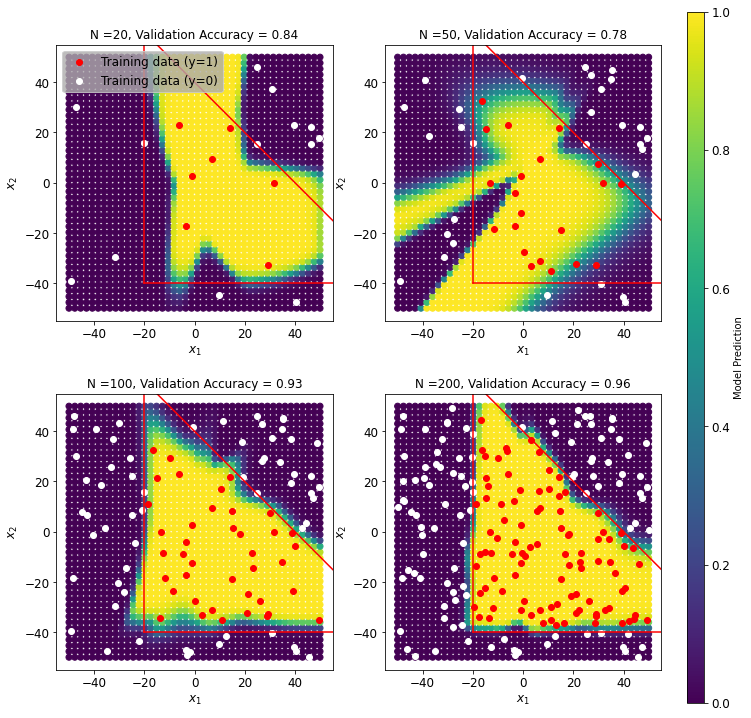

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

V= 4000 #just adding on a set amount of vaild data points
v_scores2 = []
data_size2 = [20, 50, 100, 200]
fig,AX=plt.subplots(2,2,figsize=(12,12))
R, C =0, 0

for N_train in data_size:

  (x_train, y_train) = (x[0:N_train],y[0:N_train])
  (x_valid, y_valid) = (x[len(x)-V:],y[len(x)-V:])
  
  xp = x_train #need to preserve unscaled
  x_train = Rescale(x_train)
  x_valid = Rescale(x_valid)
  
  optModel = compile_model()
  fit = optModel.fit(x_train, y_train,
                        epochs = 300, batch_size = 50,
                        validation_data=(x_valid,y_valid),
                        verbose=0)
  
  loss, acc = optModel.evaluate(x=x_valid, y=y_valid, verbose=0)
  v_scores2.append(acc)
  print('Training data length:',len(x_train), ', Validation Length = ', len(x_valid),  ', Accuracy = ', acc  )
  if R <3 and C<3  : #only plot the first 9 where the results are   

    #test_triangles(optModel, xp, y_train, N, acc)
    dX = 2 
    LG = int(np.sqrt(4000/2))
    x1 = np.linspace(-50,50,LG)
    x2 = np.linspace(-50,50,LG)
    grid = np.zeros((LG*LG,2))
    k=0
    for i in range(LG):
        for j in range(LG):
            grid[k,:]=(x1[j],x2[i])
            k=k+1

    grid_r = grid/50
    pred = optModel.predict(grid_r)

    tri_mask = [y_train==1]
    inv_tri_mask = [y_train!=1]
    
    ax=AX[C][R]
    t1 = ax.scatter(grid[:,0],grid[:,1],c=pred)
    ax.set_title('N =' + str(N_train) + ', Validation Accuracy = ' + str(round(acc,2)))
    boundaries()
    ax.scatter(xp[:,0][tri_mask],xp[:,1][tri_mask], c='red', label = 'Training data (y=1)')
    ax.scatter(xp[:,0][inv_tri_mask],xp[:,1][inv_tri_mask], c='white', label='Training data (y=0)')
    ax.set_xlim(-55,55)
    ax.set_ylim(-55,55)
    ax.set_xlabel('$x_1$', fontsize = 12)
    ax.set_ylabel('$x_2$', fontsize = 12)
    ax.set(adjustable='box', aspect='equal')
    ax.tick_params(labelsize=12)

    if R==0 and C==0:
      ax.legend(facecolor='#aeadad', fontsize = 12)
    if R >0:# Graph matrix index 
      C+=1
      R=0
    else:
      R +=1
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.19, hspace=0.02) #create pl



cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar =fig.colorbar(t1, label ='Model Prediction', cax=cb_ax)
cbar.ax.tick_params(labelsize=12)
print(v_scores2)

# Augmentation Analysis

An investigation is carried out on the effect of augmentation on the performance of the twice optimized model. An augmented data point is created by adding a little shift proportional to the variance of the data set. 

First a 4000 data set is tested. The model already performs very well on such a large data size with accuracies around 0.99. Augmentation only shifts some points accross the boundary and make the model worse as it is being trained on points that are incorrectly classified. 

Then a dataset with 50 points is tested. Only a percentage of the data is augmented. The percentages tested are 25%, 50%, 75%, 100%. Augmentation is shown to improve the validation accuracy for all of the percentages tested. 

The conclusion is that when data is scarce and the complexity of the probplem is high, augmentation will help improve accuracy. When data is bountifull and the problem is simple, augmentation can hinder the performance.

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

plt.rcParams['font.size'] = 14

%run nonlinear_function.py

ERROR:root:File `'nonlinear_function.py'` not found.


# Loading Data from Google Drive
Jake has created 8000 data samples. The first 4000 are for training purposes. The last 4000 are for validation. I am going to use the same data so there is a direct comparison.

In [26]:
#Getting Jakes Data from Google drive
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KvJvVefjGmSlIEXkLNc-KoFNdE-1uE3u' -O data_size-for-DNN-8000.dat
#https://drive.google.com/file/d/1KvJvVefjGmSlIEXkLNc-KoFNdE-1uE3u/view?usp=sharing
!wget wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1li9kjM0sSlv2H9ssPK6-p5EmwEB5rCLf' -O data_size_labels-for-DNN-8000.dat
#https://drive.google.com/file/d/1li9kjM0sSlv2H9ssPK6-p5EmwEB5rCLf/view?usp=sharing

def Filename(s,TYPE=1): #goes to sub folder data  #Type saves wasted data? 
    return ""+s+"-for-DNN-"+str(TYPE)+".dat"
#Jakes load dataset function
def load_dataset(N):          
  x = np.loadtxt(Filename("data_size", N), delimiter = ' ')
  y = np.loadtxt(Filename("data_size_labels", N), delimiter = ' ')
  return x, y
x, y = load_dataset(8000)

--2022-03-20 15:53:32--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2022-03-20 15:53:32--  https://docs.google.com/uc?export=download&id=1KvJvVefjGmSlIEXkLNc-KoFNdE-1uE3u
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.102, 172.217.204.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c7gnmprfqpltcnv8oub7t7av2sgs251h/1647791550000/02190001126285980519/*/1KvJvVefjGmSlIEXkLNc-KoFNdE-1uE3u?e=download [following]
--2022-03-20 15:53:32--  https://doc-08-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c7gnmprfqpltcnv8oub7t7av2sgs251h/1647791550000/02190001126285980519/*/1KvJvVefjGmSlIEXkLNc-KoFNdE-1uE3u?e=download
Resolving doc-08-6o-docs.googleusercontent.com (doc-0

# FUNCTIONS

### Augmenting Data Function

In [27]:
#w functions
def w_std(x):
    return np.std(x)
def w_root_std(x):
    return np.sqrt(np.std(x))

def aug_data(x_train, y_train,TYPE=1, perc_augm=1, plot_if=1, w_function=w_std): #perc_augm: % of x_train to shift and add; plot_if: plots or not
    #y_train
    # y_train = np.zeros(len(x_train))
    # for i in range(len(x_train)):
    #     y_train[i] = f(x_train[i],TYPE)
    
    x_shift = np.copy(x_train)+np.random.random()
    w = w_function(x_train) #  std deviation
#     w = np.sqrt(np.std(x_train)) #  square root of std deviation
    rnd_arr = (np.random.rand(len(x_shift), 2)-0.5)*w
    x_shift = x_shift + rnd_arr
    y_shift = np.copy(y_train)
    #reducing x_shift, y_shift (perc_augm)
    index = int(len(x_shift)*(1-perc_augm))
    if index > 0:
        x_shift = np.delete(x_shift,range(index),0)
        y_shift = np.delete(y_shift,range(index),0)
        
        
    #merging x, y datas
    x_train_shift = np.concatenate((x_train,x_shift))
    y_train_shift = np.concatenate((y_train,y_shift))

    # plots: yes=1
    
    if plot_if==1:
        size=15
        plt.figure(figsize=(5,5))
        plt.scatter(x_train[:,0],x_train[:,1],label='original',c='red',s=size,alpha=0.75)
        plt.scatter(x_shift[:,0],x_shift[:,1],label='shifted',c='lightgreen',s=size,alpha=0.75)
#         plt.scatter(x_valid[:,0],x_valid[:,1],label='valid',c='blue',s=size,alpha=0.75)  
        plt.title('% Augmentation Train Set:'+str(perc_augm)), plt.legend()
        plt.show()
    else:
        pass
    
    return x_train_shift, y_train_shift

### Rescale and Boundaries Function

In [28]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w"),ax.plot((-20,50),(-40,-40),c="w"),ax.plot((-10,50),(50,-10),c="w")

### Compiling Model Function

In [29]:
def compile_model(optimizer='RMSprop',activation='elu', neurons=20, dropout_rate=0, hidden_layers=4):
    L=2 #size of input data points
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))
    initial = RandomNormal(mean = 0., stddev = 1., seed = 12345)
    
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation,kernel_initializer = initial)) #Dense adding
        model.add(Dropout(dropout_rate))                                           #Dropout adding

    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

def simple_compile_model(optimizer='adam',activation='relu', neurons=10, dropout_rate=1, hidden_layers=1):
    L=2 #size of input data points
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))
    initial = RandomNormal(mean = 0., stddev = 1., seed = 12345)
    
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation,kernel_initializer = initial)) #Dense adding
        model.add(Dropout(dropout_rate))                                           #Dropout adding

    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### DNN Analisys Function

In [31]:
def DNN_analisys(N, x, y,TYPE=1, what_model='compile', perc_augm=0.8, nepoch=400,
                 w_function=w_root_std, plot_if=1, val=0, overlay_datapoints = False):

    x_train, y_train = x[0:N,:], y[0:N] 
    x_valid, y_valid = (x[4000:],y[4000:])
    
    x_train_shift, y_train_shift = aug_data(x_train, y_train, perc_augm=perc_augm, w_function=w_function, plot_if=plot_if)
    x_train_shift = Rescale(x_train_shift)
    x_valid = Rescale(x_valid)
    
    if what_model=='simple_compile' :
        model = simple_compile_model()
    elif what_model=='compile':
        model = compile_model()
    else:
        model = compile_model()
    #FIT
    nepoch = nepoch
    fit = model.fit(x_train_shift, y_train_shift, epochs = nepoch, batch_size = 50, validation_data=(x_valid,y_valid),verbose=0)
    loss, acc = model.evaluate(x=x_valid, y=y_valid)
    print('Training data length: x, y',len(x_train),len(y_train))
    print('Validation Accuracy = ', acc)
    
    if plot_if==1:

        #ACCURACY/LOST PLOTS
        fig,AX=plt.subplots(1,2,figsize=(14,6.))
        ax=AX[0]
        ax.plot(fit.history['accuracy'],label="train_shift")
        ax.plot(fit.history['val_accuracy'],label="valid.")
        ax.set_xlabel('epoch')
        ax.set_ylabel("Accuracy")
        ax=AX[1]
        ax.plot(fit.history['loss'],label="train_shift")
        ax.plot(fit.history['val_loss'],label="valid.")
        ax.set_xlabel('epoch')
        ax.set_ylabel("Loss")
        ax.legend()

        #PREDICTION GRID PLOTS
        dX = 2
        X1 = np.arange(-50,50+dX, dX)
        LG = len(X1)
        grid = np.zeros((LG*LG,2))
        k=0
        for i in range(LG):
            for j in range(LG):
                grid[k,:]=(X1[j],X1[i])
                k=k+1
        grid_r = grid/50
        pred = model.predict(grid_r)

        fig2,AX2=plt.subplots(1,3,figsize=(16,5.))
        ax=AX2[0]
        ax.scatter(x_train_shift[:,0]*50,x_train_shift[:,1]*50,c=y_train_shift)
        ax.plot((-20,-20),(-40,50),c="r"),ax.plot((-20,50),(-40,-40),c="r"),ax.plot((-10,50),(50,-10),c="r")
        
        ax=AX2[1]
        if overlay_datapoints == True:
          p_out = x_train_shift[y_train_shift<0.5]
          p_in = x_train_shift[y_train_shift>0.5]
          ax.scatter(p_in[:,0]*50,p_in[:,1]*50,c='r',zorder = 25)
          ax.scatter(p_out[:,0]*50,p_out[:,1]*50,c='w',zorder = 20)
        ax.scatter(grid[:,0],grid[:,1],c=pred)
        ax.plot((-20,-20),(-40,50),c="r"),ax.plot((-20,50),(-40,-40),c="r"),ax.plot((-10,50),(50,-10),c="r")
        # place a text box in upper left in axes coords
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
        ax.text(0.05, 0.95, 'AugmentedData% :'+str(perc_augm)+'\nValidation Accuracy:'+str(round(acc,4)), transform=ax.transAxes,
                                                   fontsize=12, verticalalignment='top', bbox=props)


        ax=AX2[2]
        W1=np.where(pred>0.5)[0] 
        ax.scatter(grid[:,0],grid[:,1],c="#440154")
        ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
        ax.plot((-20,-20),(-40,50),c="r"),ax.plot((-20,50),(-40,-40),c="r"),ax.plot((-10,50),(50,-10),c="r")
    if val==1:
        return acc

In [16]:
X = x[0:10,:]
Y = y[0:10]

p_out = X[Y > 0.5]
p_in = X[Y < 0.5]



In [ ]:
np.random.seed(111)

# Analisys on the whole Dataset (4000), simple DNN
Loss/Accuracy plots and Prediction grids for AugmentedData% = [0, 0.25, 0.50, 0.75, 1].
Shift function used: random * standard_deviation

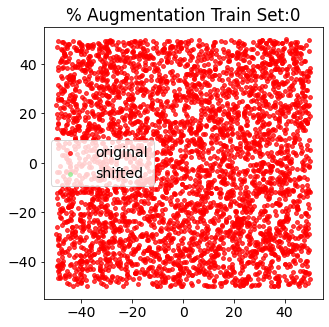

125/125 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9937
Training data length: x, y 4000 4000
Validation Accuracy =  0.9937499761581421


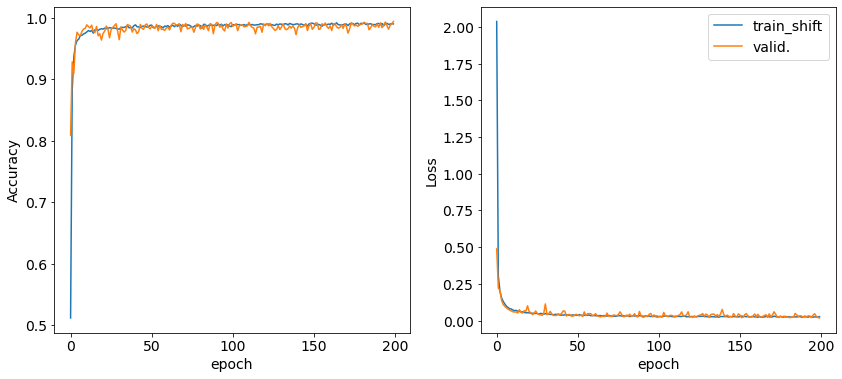

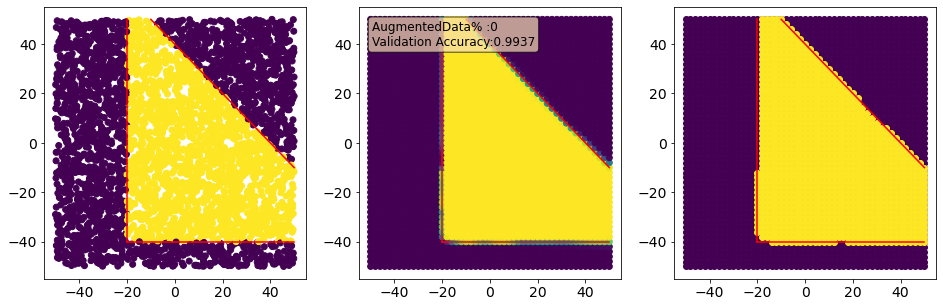

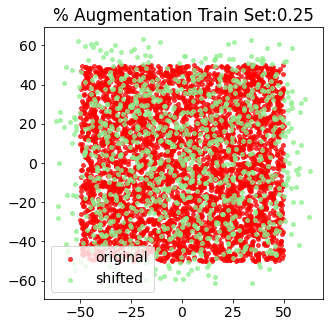

125/125 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9747
Training data length: x, y 4000 4000
Validation Accuracy =  0.9747499823570251


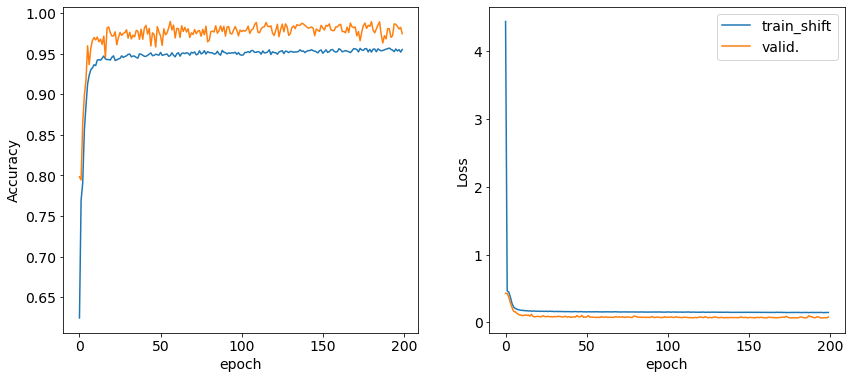

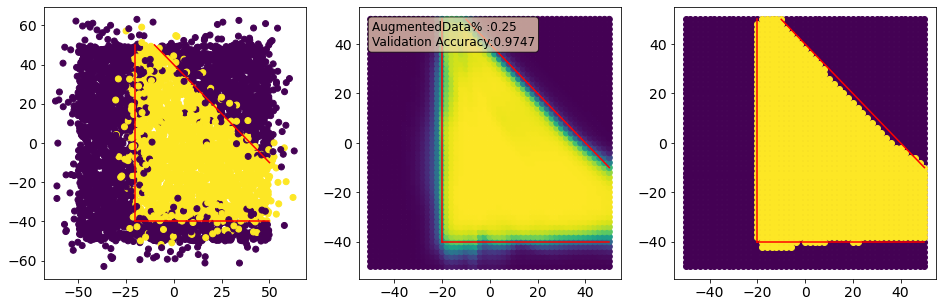

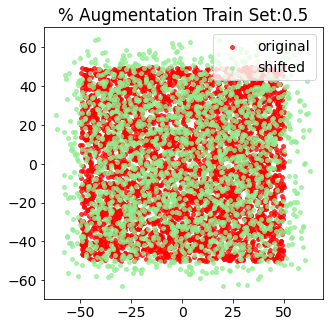

125/125 [==============================] - 1s 6ms/step - loss: 0.0989 - accuracy: 0.9770
Training data length: x, y 4000 4000
Validation Accuracy =  0.9769999980926514


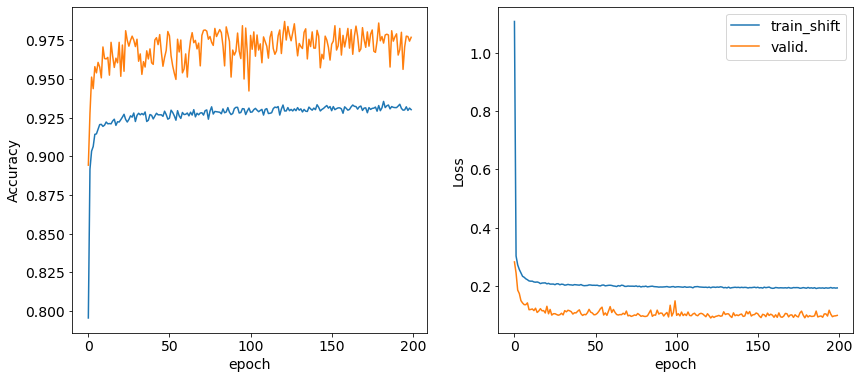

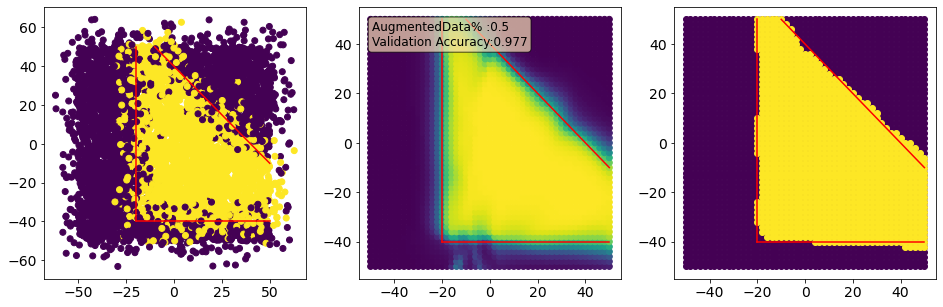

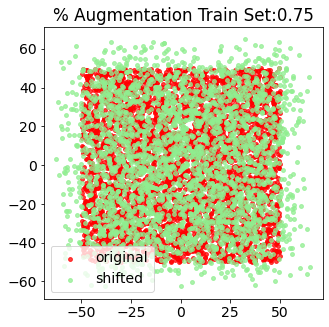

125/125 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.9770
Training data length: x, y 4000 4000
Validation Accuracy =  0.9769999980926514


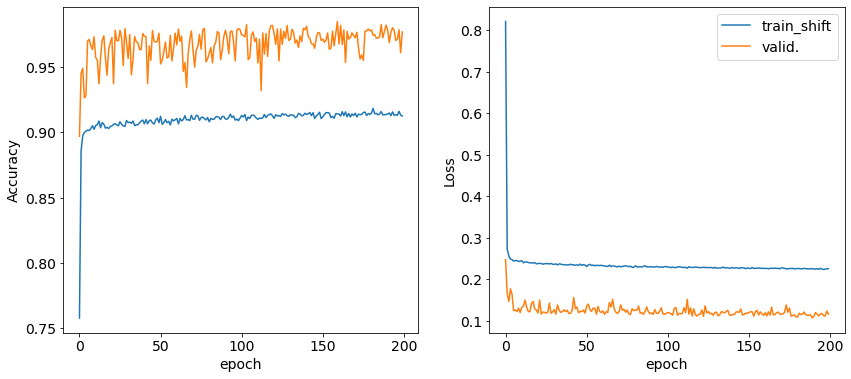

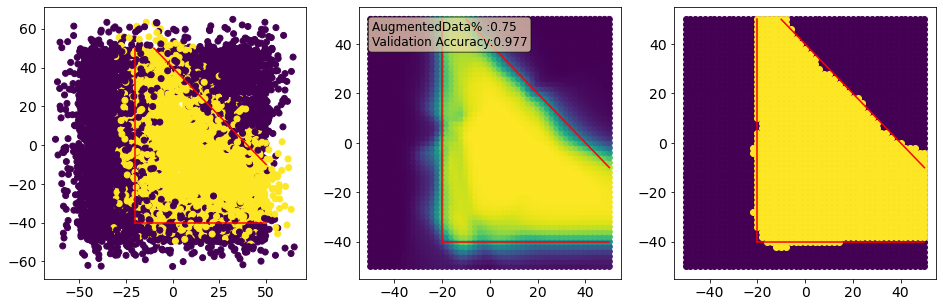

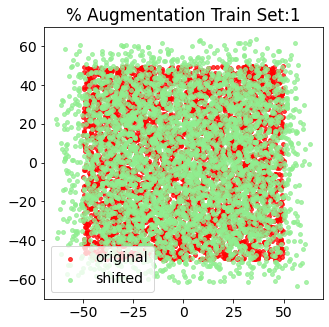

125/125 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.9762
Training data length: x, y 4000 4000
Validation Accuracy =  0.9762499928474426


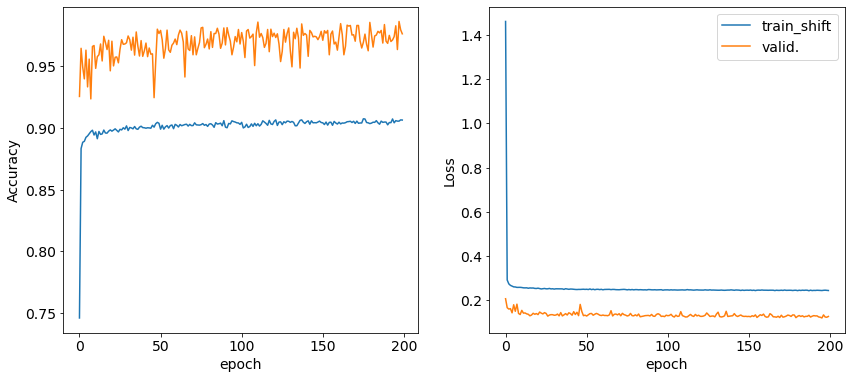

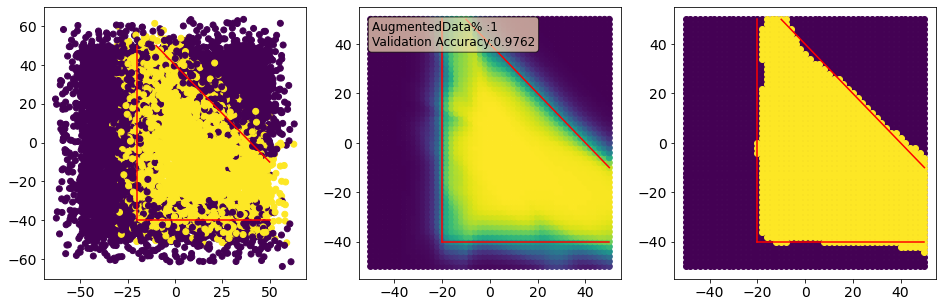

In [35]:
augm_percs = [0, 0.25, 0.5, 0.75, 1]
for perc in augm_percs:
    DNN_analisys(N = 4000,x = x,y = y, perc_augm=perc, what_model='simple', nepoch=200, w_function=w_std)

# Analisys on a small dataset (100), best DNN
Parameters evaluation: AugmentationData%, w_function 

<function matplotlib.pyplot.show>

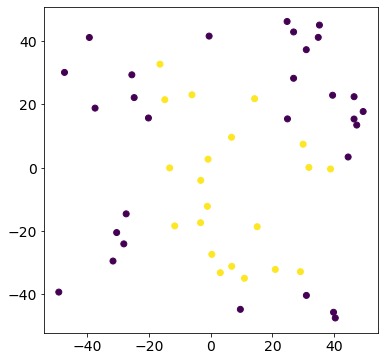

In [6]:
N = 50

plt.figure(figsize = (6,6))
plt.scatter(x[0:N,0],x[0:N,1],c=y[0:N])
plt.show

### w = w_root_std

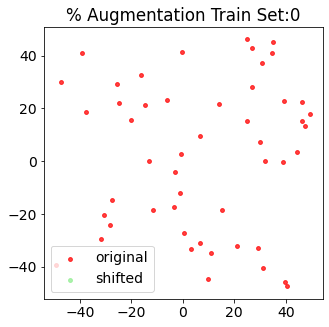

125/125 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8813
Training data length: x, y 50 50
Validation Accuracy =  0.8812500238418579


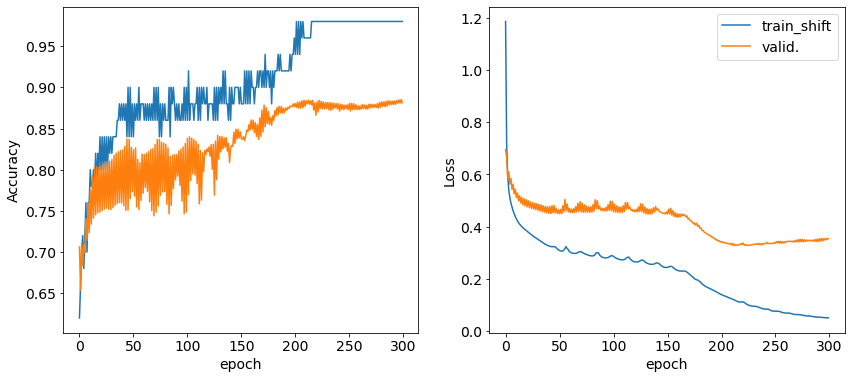

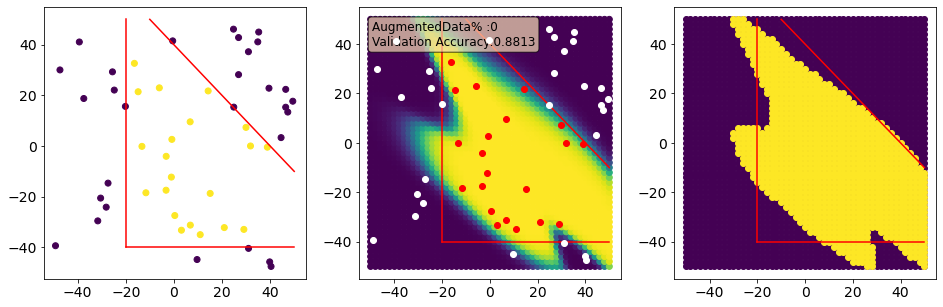

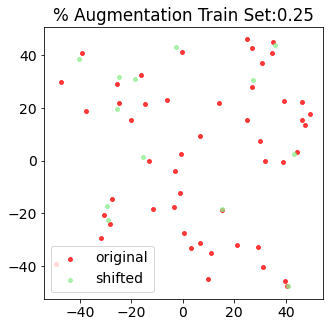

125/125 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8915
Training data length: x, y 50 50
Validation Accuracy =  0.8914999961853027


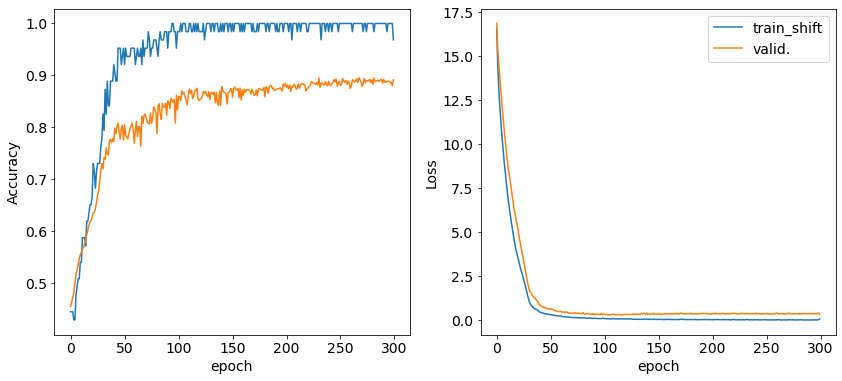

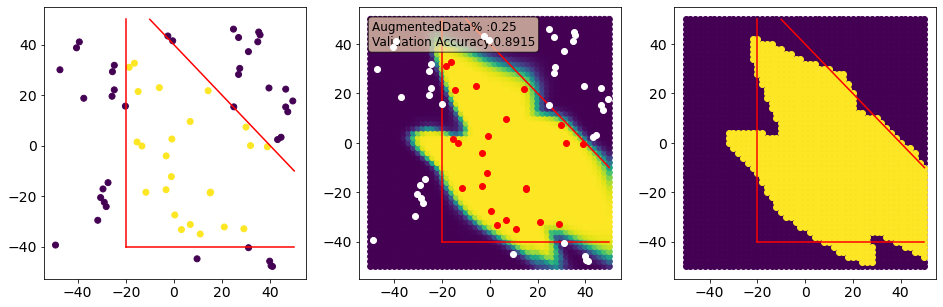

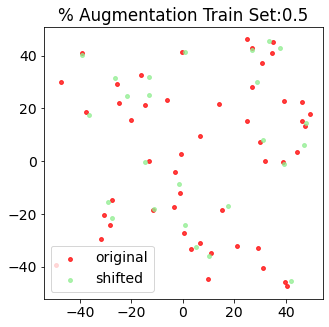

125/125 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9237
Training data length: x, y 50 50
Validation Accuracy =  0.9237499833106995


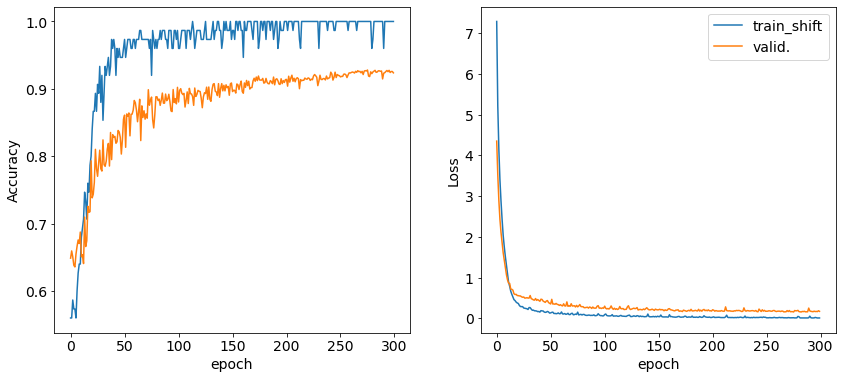

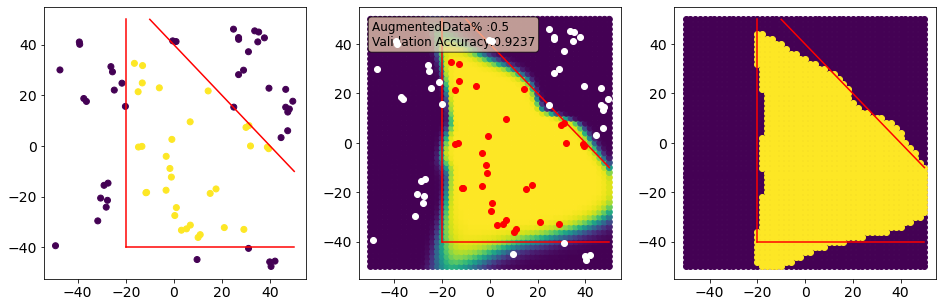

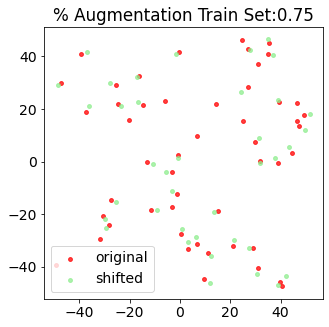

125/125 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8898
Training data length: x, y 50 50
Validation Accuracy =  0.8897500038146973


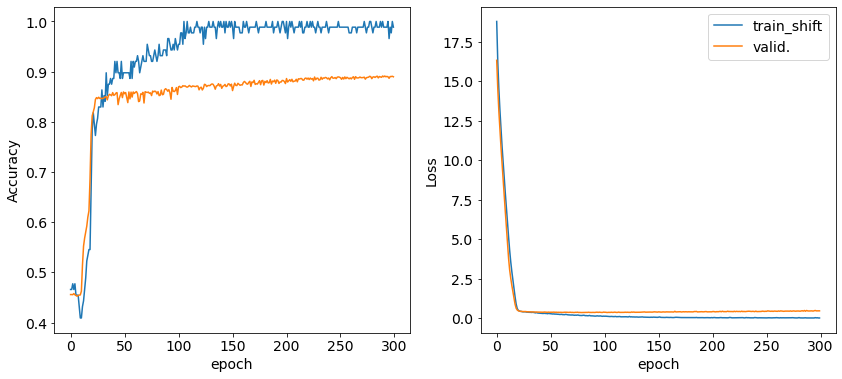

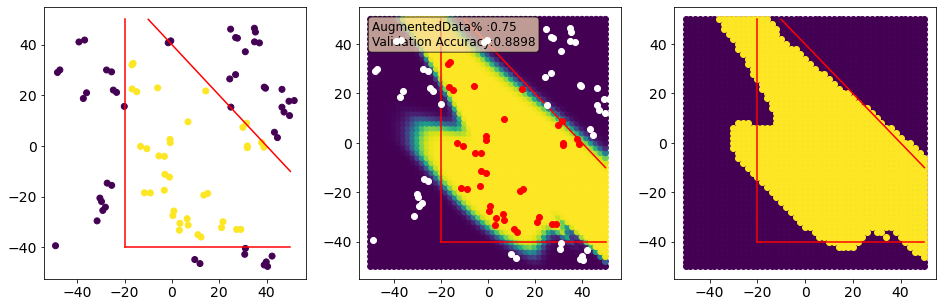

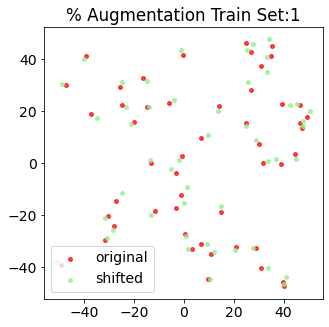

125/125 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9323
Training data length: x, y 50 50
Validation Accuracy =  0.9322500228881836


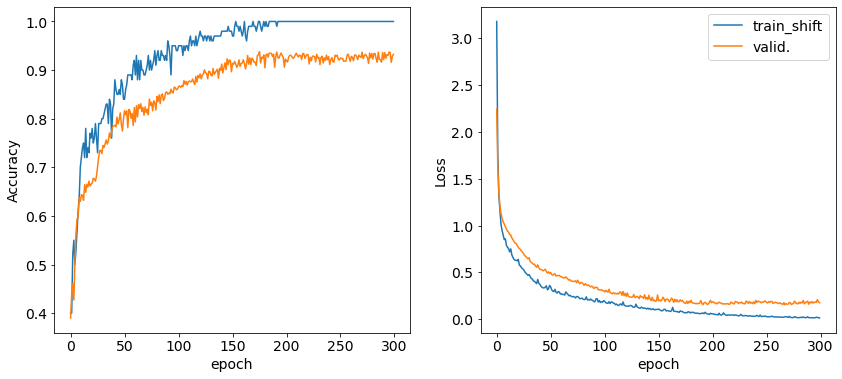

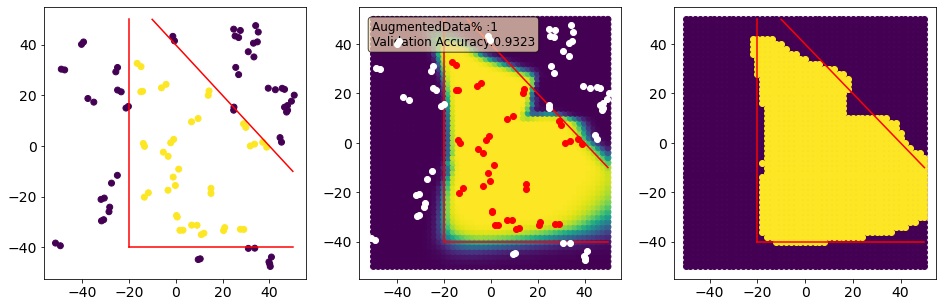

In [34]:
augm_percs = [0, 0.25, 0.5, 0.75, 1]
for perc in augm_percs:
    DNN_analisys(N,x,y, perc_augm=perc, what_model='compile', nepoch=300, w_function=w_root_std, overlay_datapoints=True)

### w = w_std

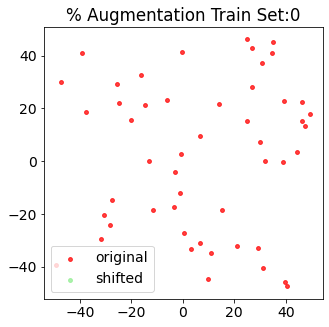

125/125 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.8882
Training data length: x, y 50 50
Validation Accuracy =  0.8882499933242798


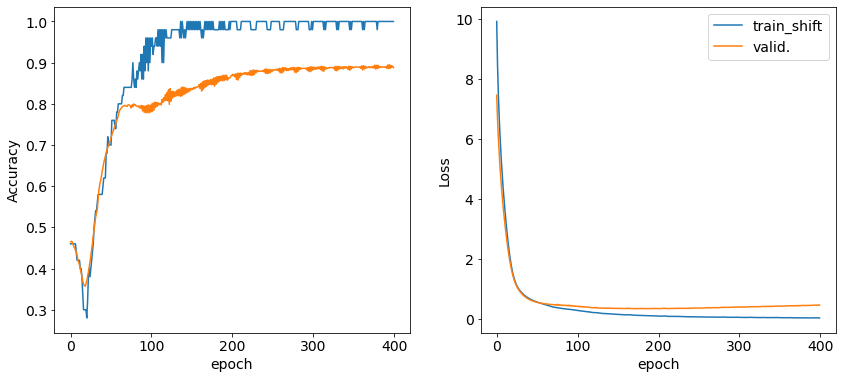

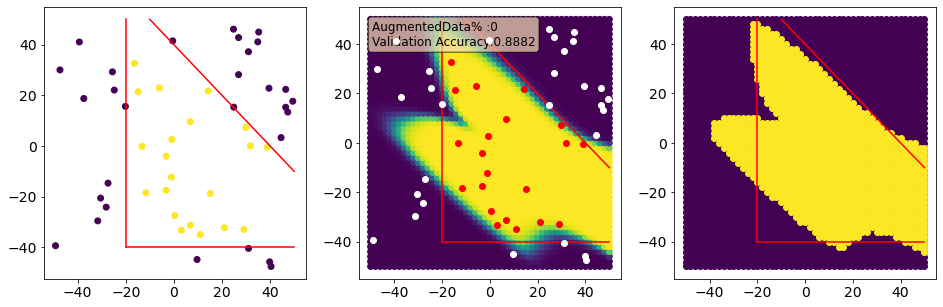

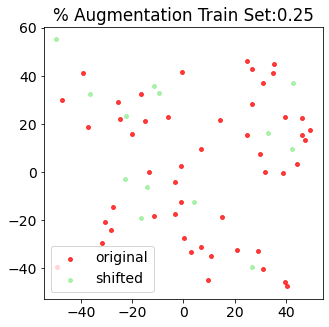

125/125 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.9162
Training data length: x, y 50 50
Validation Accuracy =  0.9162499904632568


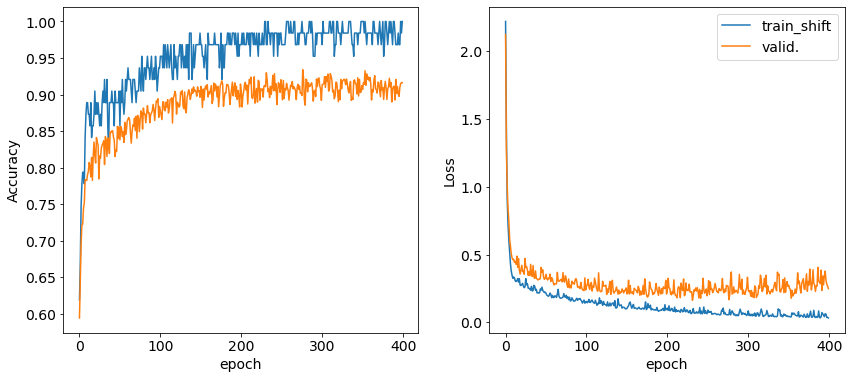

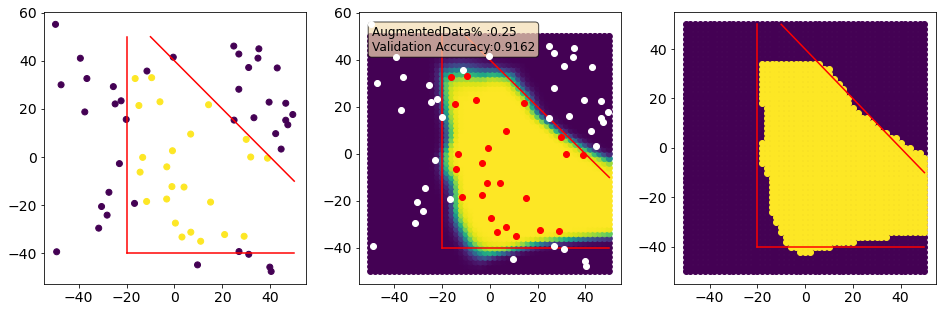

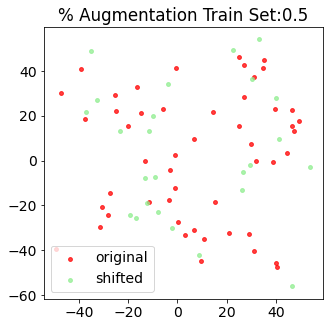

125/125 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8928
Training data length: x, y 50 50
Validation Accuracy =  0.8927500247955322


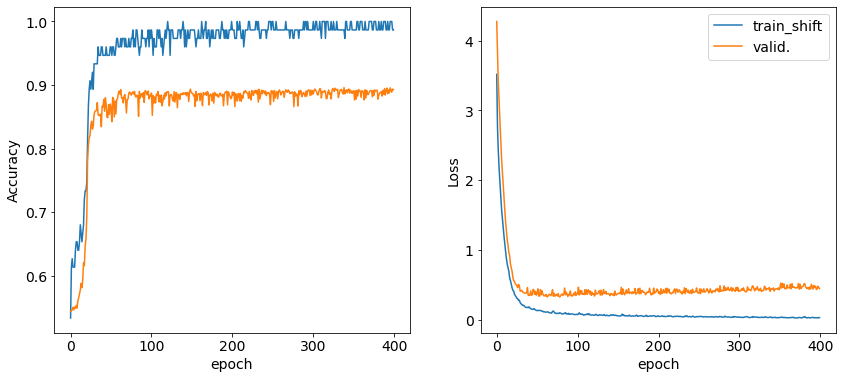

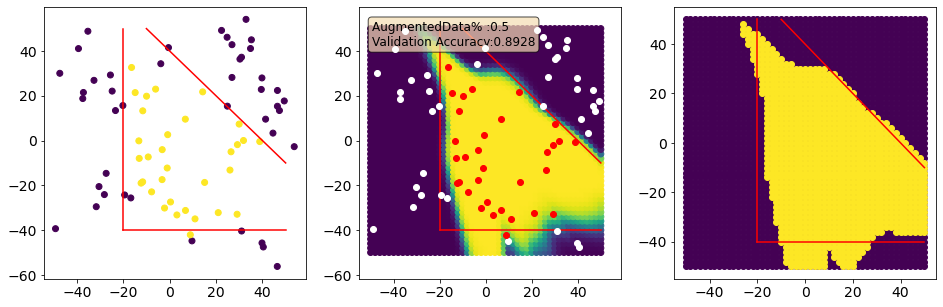

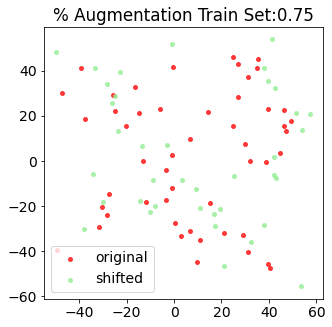

125/125 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8848
Training data length: x, y 50 50
Validation Accuracy =  0.8847500085830688


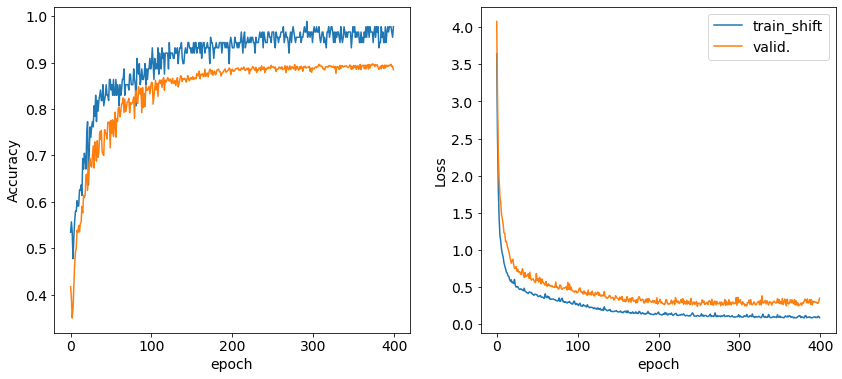

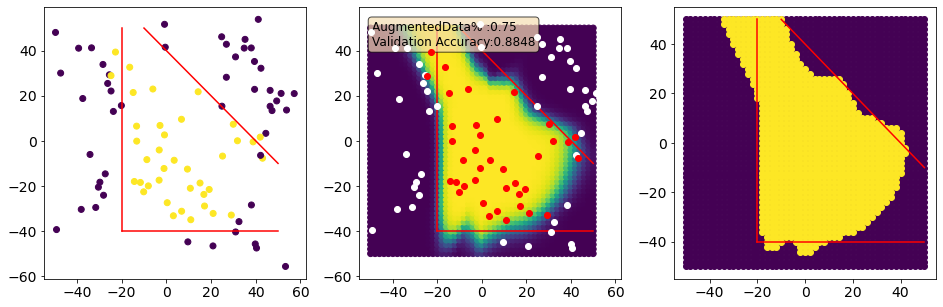

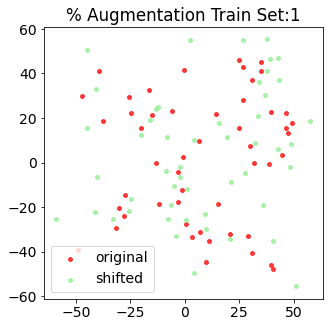

125/125 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8660
Training data length: x, y 50 50
Validation Accuracy =  0.8659999966621399


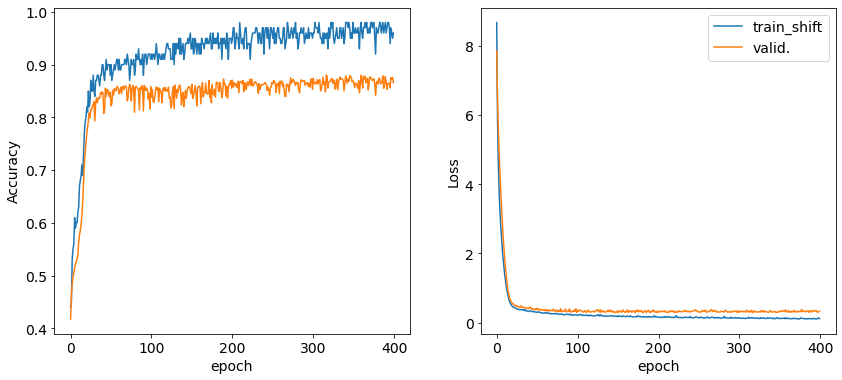

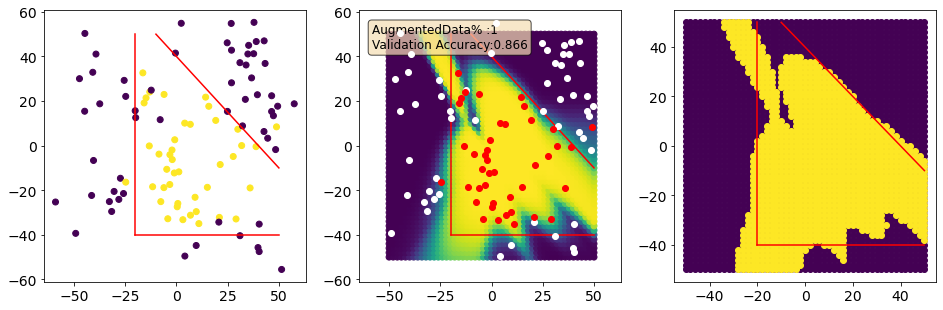

In [32]:
augm_percs = [0, 0.25, 0.5, 0.75, 1]
for perc in augm_percs:
    DNN_analisys(N, x, y, perc_augm=perc, what_model='compile', nepoch=400, w_function=w_std, overlay_datapoints = True)

# New Data-set and Architecture Optimization

With a grid-search similar to the one described before, we define a complex DNN that is able to solve our classification problem. The complexity of our model is defined as number of layers and number of neurons per layer. This model is obtained by not allowing the number of neurons per layer to change. This is an arbitrary choice taken for gaining computational time during grid-search. We will try to prune our complex DNN to find a simpler one that can performs similarly. We drop the constraint on the number of neurons per layer, trying to decrease the complexity of the DNN. After some tries we succeeded in finding one simpler DNN with good performance.

The complex and simple DNN have a similar accuracy. Therefore the accuracy dependence on DNN architecture is studied. Accuracy is defined as the fraction of correct predictions on the validation data-set. Starting from the trained complex DNN, random neurons of the last layer are deactivated. This is achieved by manually setting their weights to zero. The model in not retrained. The accuracy of the DNN is evaluated as the number of active last layer's neurons increases. This operation is repeated 100 times. The mean and standard deviation of the accuracy is calculated. This is plotted against the active neurons of the last layer. This is only performed on the last layer to save computation time.


<a href="https://colab.research.google.com/github/DanHarJor/CompLabB-UNIPD-TeamDream/blob/colab_daniel/DNN_colab_daniel_profData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
plt.rcParams['font.size'] = 14

2022-03-16 14:56:35.783035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# DNN: analysis with Keras of 2D data

We now want to generate a new dataset, more complex, in which the classes are separated by a non-function

In [2]:
# a nonlinear function of a 2d array x
def f(x,c=1):
    label=0
    
    
    R = 10 #radius of the circle for case 3
    k = 10 # periods of the 
    C = 3 # magnitude of the sinusoide
    
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            label=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            label=1
    if c==3:
        r_point = np.sqrt( x[0]**2 + x[1]**2 )
        
        if r_point < R + C *np.sin(k * np.arctan(x[1]/x[0])):
            label=1
        
    
    return label


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

2
[-9.48243565 -8.86319164] 0.0
[2.03175087 2.86634109] 1.0
[13.93543559  4.59531291] 0.0
[7.46719913 4.60709613] 0.0
[ 7.43144428 13.83920208] 0.0
[-14.74835106 -11.8066687 ] 0.0
[-6.03888859  4.69233549] 1.0
[ 9.29437658 11.16527741] 0.0
[13.93942792  6.71056041] 0.0
[4.27425984 6.52360862] 1.0
data: 4000
train: 3200


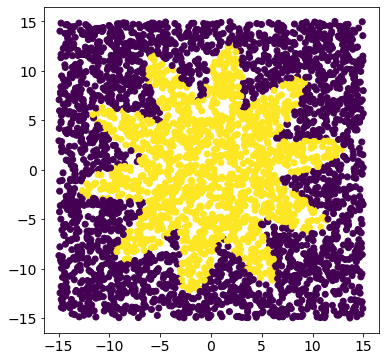

In [217]:
# Keras works with numpy arrays: just use them from the start
TYPE=3
perc_train = 0.8
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.savefig('./Graphs/flower',dpi=300)

### Split training and test data

In [4]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [5]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

# Define the model with Keras
Initially we define a model and then optmize the parameters through some gridsearchs.
In this case we are fixing the number of neurons per layer in the whole network, not assuming the possibily of changing between layers.

# optimising parameters

In [48]:
#Defining the model, altered for new catagorical lables and for grid search
def init_model(optimizer='RMSprop',activation='relu', neurons=20, dropout_rate=0, hidden_layers=4, init_mode='normal'):
    #definition of the architecture
    L=2 #size of input data points
    seed = 12345
    #keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))

    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation, kernel_initializer = init_mode))
        model.add(Dropout(dropout_rate))


    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy',  #tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

#### hidden layers

In [49]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
hidden_layers = [2,3,4,5]

# define parameter dictionary
param_grid = dict(hidden_layers = hidden_layers)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['hidden_layers'] = [grid_result.best_params_['hidden_layers']]

Best: 0.763750 using {'hidden_layers': 2}


#### neurons number

In [50]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
neurons = [5,10,15,20,25]
# define parameter dictionary
param_grid['neurons'] = neurons
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['neurons'] = [grid_result.best_params_['neurons']]

Best: 0.765937 using {'hidden_layers': 2, 'neurons': 25}


#### optimizer

In [51]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


# define parameter dictionary
param_grid['optimizer'] =optimizer
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

param_grid['optimizer'] = [grid_result.best_params_['optimizer']]

Best: 0.765937 using {'hidden_layers': 2, 'neurons': 25, 'optimizer': 'RMSprop'}


#### weigth initializers

In [52]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

# define parameter dictionary
param_grid['init_mode'] =init_mode
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['init_mode'] = [grid_result.best_params_['init_mode']]

Best: 0.779375 using {'hidden_layers': 2, 'init_mode': 'he_uniform', 'neurons': 25, 'optimizer': 'RMSprop'}


#### activation

In [53]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activation = ['sigmoid', 'relu', 'elu','softmax']

# define parameter dictionary
param_grid['activation'] = activation
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

param_grid['activation'] = [grid_result.best_params_['activation']]

Best: 0.871875 using {'activation': 'elu', 'hidden_layers': 2, 'init_mode': 'he_uniform', 'neurons': 25, 'optimizer': 'RMSprop'}


#### dropout rate

In [54]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
dropout_rate = [0,0.1,0.2,0.3,0.4, 0.5]

# define parameter dictionary
param_grid['dropout_rate'] = dropout_rate
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['dropout_rate'] = [grid_result.best_params_['dropout_rate']]

Best: 0.871875 using {'activation': 'elu', 'dropout_rate': 0, 'hidden_layers': 2, 'init_mode': 'he_uniform', 'neurons': 25, 'optimizer': 'RMSprop'}


#### batch size

In [55]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
batch_size = [20,30, 50,80, 100]

# define parameter dictionary
param_grid['batch_size'] = batch_size
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['batch_size'] = [grid_result.best_params_['batch_size']]

Best: 0.871875 using {'activation': 'elu', 'batch_size': 20, 'dropout_rate': 0, 'hidden_layers': 2, 'init_mode': 'he_uniform', 'neurons': 25, 'optimizer': 'RMSprop'}


## massive gridsearch

In [ ]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
activation = ['sigmoid', 'relu', 'elu','softmax']
dropout_rate = [0,0.1,0.2,0.3,0.4]
hidden_layers = [2,3,4,5]
neurons = [3,4,5,10,15,20,25,30]
batch_size = [20,50,80,100]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(optimizer=optimizer,init_mode=init_mode, batch_size=batch_size, activation=activation,dropout_rate=dropout_rate, hidden_layers=hidden_layers,neurons=neurons)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Optimization with different neurons number per layer (decreasing)

Now we allow the network to be more flexible in order to find a simple DNN that can solve our problem with a lower number of neurons. This time we gridsearch the complete architecture, not number of hidden layers and neurons separately. This allow us to simplify the model.

In [80]:
#Defining the model, altered for new catagorical lables and for grid search
def init_model(optimizer='RMSprop',activation='elu', layers=[5,4,3], dropout_rate=0, init_mode='glorot_uniform'):
    
    hidden_layers = len(layers)
    #definition of the architecture
    L=2 #size of input data points
    seed = 12345
    #keras.utils.set_random_seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation=activation))

    for i in range(hidden_layers):
        model.add(Dense(layers[i], activation=activation, kernel_initializer = init_mode))
        model.add(Dropout(dropout_rate))


    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy',  #tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

#### layers

In [81]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
layers = [ (20,10,5,3), (15,10,5,,3), (20,10,5,5), (10,5,5,3,3), (20,15,10,5,3),(20,15,10,5)]

# define parameter dictionary
param_grid = dict(layers = layers)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['layers'] = [grid_result.best_params_['layers']]

Best: 0.874375 using {'layers': (20, 10, 5, 3)}


#### optimizer

In [82]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


# define parameter dictionary
param_grid['optimizer'] =optimizer
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

param_grid['optimizer'] = [grid_result.best_params_['optimizer']]

Best: 0.874375 using {'layers': (20, 10, 5, 3), 'optimizer': 'RMSprop'}


#### weigth initializers

In [83]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
init_mode = ['uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

# define parameter dictionary
param_grid['init_mode'] =init_mode
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['init_mode'] = [grid_result.best_params_['init_mode']]

Best: 0.874375 using {'init_mode': 'glorot_uniform', 'layers': (20, 10, 5, 3), 'optimizer': 'RMSprop'}


#### activation

In [84]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activation = ['sigmoid', 'relu', 'elu','softmax']

# define parameter dictionary
param_grid['activation'] = activation
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

param_grid['activation'] = [grid_result.best_params_['activation']]

Best: 0.874375 using {'activation': 'elu', 'init_mode': 'glorot_uniform', 'layers': (20, 10, 5, 3), 'optimizer': 'RMSprop'}


#### dropout rate

In [85]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
dropout_rate = [0,0.1,0.2,0.3,0.4, 0.5]

# define parameter dictionary
param_grid['dropout_rate'] = dropout_rate
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['dropout_rate'] = [grid_result.best_params_['dropout_rate']]

Best: 0.874375 using {'activation': 'elu', 'dropout_rate': 0, 'init_mode': 'glorot_uniform', 'layers': (20, 10, 5, 3), 'optimizer': 'RMSprop'}


#### batch size

In [86]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=100,
                        batch_size=50, 
                        verbose=0)

# list of allowed optional arguments for the optimizer, see `compile_model()`
batch_size = [20,30, 50,80, 100]

# define parameter dictionary
param_grid['batch_size'] = batch_size
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
param_grid['batch_size'] = [grid_result.best_params_['batch_size']]

Best: 0.876875 using {'activation': 'elu', 'batch_size': 30, 'dropout_rate': 0, 'init_mode': 'glorot_uniform', 'layers': (20, 10, 5, 3), 'optimizer': 'RMSprop'}


## massive gridsearch

In [94]:
model_gridsearch = KerasClassifier(build_fn=init_model, 
                        epochs=50,
                        batch_size=50, 
                        verbose=0)

optimizer = [ 'RMSprop', 'Adam', 'Adamax', 'Nadam']
#activation = ['sigmoid', 'relu', 'elu']
#dropout_rate = [0,0.1,0.2]
layers = [(20,15,5,3), (20,15,5,5)]
#batch_size = [10,20,30]
init_mode = ['glorot_normal', 'glorot_uniform', 'he_normal']

#optimizer = [ 'Nadam']
activation = ['elu']
#dropout_rate = [0.]
#layers = [(20,10,5), (15,10,5,3), (20,10,5,3), (20,5,4,3), (20,15,5,3), (15,10,5,3)]
batch_size = [10]
#init_mode = ['he_normal']

param_grid = dict(optimizer=optimizer,init_mode=init_mode, batch_size=batch_size, activation=activation,dropout_rate=dropout_rate, layers=layers)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.873438 using {'activation': 'elu', 'batch_size': 10, 'dropout_rate': 0, 'init_mode': 'he_normal', 'layers': (20, 15, 5, 5), 'optimizer': 'Adam'}


# comparing simple and complex model
Now that we have our complex and simple model we fully train them and compare their performances

In [340]:
complex_model = init_model(activation='elu', dropout_rate=0, layers=(50,50,50,50,50), optimizer='Nadam')

In [341]:
fit_complex = complex_model.fit(x_train,y_train, validation_data = (x_valid,y_valid),batch_size=20, epochs=500)

Epoch 1/500
160/160 [==============================] - 2s 3ms/step - loss: 0.6068 - accuracy: 0.6373 - val_loss: 0.3813 - val_accuracy: 0.8462
Epoch 2/500
160/160 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8255 - val_loss: 0.3081 - val_accuracy: 0.8750
Epoch 3/500
160/160 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8594 - val_loss: 0.2793 - val_accuracy: 0.8825
Epoch 4/500
160/160 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8604 - val_loss: 0.3102 - val_accuracy: 0.8712
Epoch 5/500
160/160 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8554 - val_loss: 0.2826 - val_accuracy: 0.8775
Epoch 6/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8709 - val_loss: 0.2987 - val_accuracy: 0.8650
Epoch 7/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8667 - val_loss: 0.2694 - val_accuracy: 0.8825

Epoch 58/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.8795 - val_loss: 0.2374 - val_accuracy: 0.8925
Epoch 59/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8823 - val_loss: 0.2289 - val_accuracy: 0.8950
Epoch 60/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8778 - val_loss: 0.2182 - val_accuracy: 0.9000
Epoch 61/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.8917 - val_loss: 0.2118 - val_accuracy: 0.8950
Epoch 62/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.8920 - val_loss: 0.2248 - val_accuracy: 0.8875
Epoch 63/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.8946 - val_loss: 0.2061 - val_accuracy: 0.9062
Epoch 64/500
160/160 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9038 - val_loss: 0.2222 - val_accuracy:

Epoch 115/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9539 - val_loss: 0.1248 - val_accuracy: 0.9475
Epoch 116/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9665 - val_loss: 0.1646 - val_accuracy: 0.9300
Epoch 117/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9574 - val_loss: 0.1477 - val_accuracy: 0.9438
Epoch 118/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9549 - val_loss: 0.1144 - val_accuracy: 0.9463
Epoch 119/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9478 - val_loss: 0.1316 - val_accuracy: 0.9425
Epoch 120/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9492 - val_loss: 0.1460 - val_accuracy: 0.9337
Epoch 121/500
160/160 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9608 - val_loss: 0.1262 - val_ac

160/160 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9769 - val_loss: 0.1859 - val_accuracy: 0.9275
Epoch 228/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9704 - val_loss: 0.1082 - val_accuracy: 0.9550
Epoch 229/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9698 - val_loss: 0.0965 - val_accuracy: 0.9488
Epoch 230/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9690 - val_loss: 0.0912 - val_accuracy: 0.9588
Epoch 231/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9699 - val_loss: 0.0688 - val_accuracy: 0.9725
Epoch 232/500
160/160 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9807 - val_loss: 0.1237 - val_accuracy: 0.9550
Epoch 233/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9786 - val_loss: 0.1275 - val_accuracy: 0.9513

160/160 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9660 - val_loss: 0.0812 - val_accuracy: 0.9700
Epoch 340/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9778 - val_loss: 0.0673 - val_accuracy: 0.9688
Epoch 341/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9764 - val_loss: 0.0945 - val_accuracy: 0.9613
Epoch 342/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9808 - val_loss: 0.1314 - val_accuracy: 0.9513
Epoch 343/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9777 - val_loss: 0.1045 - val_accuracy: 0.9613
Epoch 344/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9775 - val_loss: 0.1228 - val_accuracy: 0.9450
Epoch 345/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9711 - val_loss: 0.1329 - val_accuracy: 0.9463

160/160 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9847 - val_loss: 0.1426 - val_accuracy: 0.9413
Epoch 452/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9773 - val_loss: 0.0868 - val_accuracy: 0.9613
Epoch 453/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9773 - val_loss: 0.1039 - val_accuracy: 0.9638
Epoch 454/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9817 - val_loss: 0.1315 - val_accuracy: 0.9550
Epoch 455/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9736 - val_loss: 0.0813 - val_accuracy: 0.9750
Epoch 456/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9772 - val_loss: 0.0911 - val_accuracy: 0.9638
Epoch 457/500
160/160 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9799 - val_loss: 0.1811 - val_accuracy: 0.9375

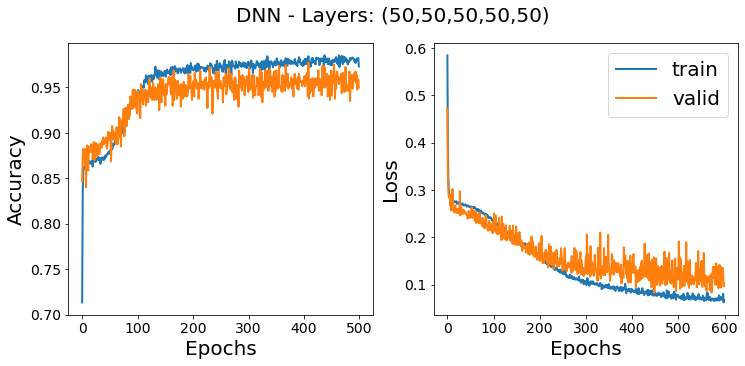

In [342]:
fig,AX=plt.subplots(1,2,figsize=(12,5))

ax=AX[0]
ax.plot(fit_complex.history['accuracy'],label="train", lw=2)
ax.plot(fit_complex.history['val_accuracy'],label="valid", lw=2)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
ax=AX[1]
ax.plot(fit_simple2.history['loss'],label="train", lw=2)
ax.plot(fit_simple2.history['val_loss'],label="valid", lw=2)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend(fontsize=20)
plt.suptitle('DNN - Layers: (50,50,50,50,50)', fontsize=20)
plt.savefig('./Graphs/training_curve_complex_DNN', dpi=300)


In [343]:
simple_model2 = init_model(activation='elu',dropout_rate=0, init_mode='he_normal',layers=(20,15,5,3), optimizer='Nadam')

In [344]:
fit_simple2 = simple_model2.fit(x_train, y_train, validation_data = (x_valid,y_valid), epochs=600, batch_size=10)

Epoch 1/600
320/320 [==============================] - 2s 2ms/step - loss: 0.6736 - accuracy: 0.6011 - val_loss: 0.4725 - val_accuracy: 0.8300
Epoch 2/600
320/320 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8332 - val_loss: 0.3335 - val_accuracy: 0.8788
Epoch 3/600
320/320 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8669 - val_loss: 0.2999 - val_accuracy: 0.8813
Epoch 4/600
320/320 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.8675 - val_loss: 0.2848 - val_accuracy: 0.8863
Epoch 5/600
320/320 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8666 - val_loss: 0.2851 - val_accuracy: 0.8712
Epoch 6/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8771 - val_loss: 0.2869 - val_accuracy: 0.8712
Epoch 7/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.8692 - val_loss: 0.2666 - val_accuracy: 0.8838

Epoch 58/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8736 - val_loss: 0.2502 - val_accuracy: 0.8875
Epoch 59/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8702 - val_loss: 0.2563 - val_accuracy: 0.8900
Epoch 60/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8686 - val_loss: 0.2351 - val_accuracy: 0.8938
Epoch 61/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8782 - val_loss: 0.2421 - val_accuracy: 0.8925
Epoch 62/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8826 - val_loss: 0.2550 - val_accuracy: 0.8813
Epoch 63/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.8793 - val_loss: 0.2305 - val_accuracy: 0.8938
Epoch 64/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.8860 - val_loss: 0.2413 - val_accuracy:

Epoch 115/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.8998 - val_loss: 0.2219 - val_accuracy: 0.8913
Epoch 116/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.8949 - val_loss: 0.2138 - val_accuracy: 0.9150
Epoch 117/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.8999 - val_loss: 0.2227 - val_accuracy: 0.9038
Epoch 118/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9083 - val_loss: 0.1941 - val_accuracy: 0.9200
Epoch 119/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.8991 - val_loss: 0.2436 - val_accuracy: 0.8888
Epoch 120/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9084 - val_loss: 0.1966 - val_accuracy: 0.9125
Epoch 121/600
320/320 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.8996 - val_loss: 0.1972 - val_ac

320/320 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9418 - val_loss: 0.1678 - val_accuracy: 0.9350
Epoch 228/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9396 - val_loss: 0.1605 - val_accuracy: 0.9275
Epoch 229/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.9408 - val_loss: 0.1640 - val_accuracy: 0.9388
Epoch 230/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9327 - val_loss: 0.1430 - val_accuracy: 0.9538
Epoch 231/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9429 - val_loss: 0.1338 - val_accuracy: 0.9362
Epoch 232/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.9395 - val_loss: 0.1366 - val_accuracy: 0.9425
Epoch 233/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.9442 - val_loss: 0.1686 - val_accuracy: 0.9237

320/320 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9599 - val_loss: 0.1288 - val_accuracy: 0.9463
Epoch 340/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9586 - val_loss: 0.1772 - val_accuracy: 0.9287
Epoch 341/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9649 - val_loss: 0.1204 - val_accuracy: 0.9375
Epoch 342/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9661 - val_loss: 0.1203 - val_accuracy: 0.9425
Epoch 343/600
320/320 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9564 - val_loss: 0.1200 - val_accuracy: 0.9500
Epoch 344/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9608 - val_loss: 0.1590 - val_accuracy: 0.9312
Epoch 345/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9547 - val_loss: 0.1273 - val_accuracy: 0.9375

320/320 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9758 - val_loss: 0.1274 - val_accuracy: 0.9388
Epoch 452/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9711 - val_loss: 0.1434 - val_accuracy: 0.9475
Epoch 453/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9741 - val_loss: 0.1552 - val_accuracy: 0.9350
Epoch 454/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9678 - val_loss: 0.1029 - val_accuracy: 0.9538
Epoch 455/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9668 - val_loss: 0.0993 - val_accuracy: 0.9500
Epoch 456/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9668 - val_loss: 0.1095 - val_accuracy: 0.9525
Epoch 457/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9694 - val_loss: 0.1391 - val_accuracy: 0.9413

320/320 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9611 - val_loss: 0.1117 - val_accuracy: 0.9513
Epoch 564/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9684 - val_loss: 0.1051 - val_accuracy: 0.9588
Epoch 565/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9678 - val_loss: 0.1162 - val_accuracy: 0.9500
Epoch 566/600
320/320 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9675 - val_loss: 0.1134 - val_accuracy: 0.9525
Epoch 567/600
320/320 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9766 - val_loss: 0.1116 - val_accuracy: 0.9575
Epoch 568/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9728 - val_loss: 0.1183 - val_accuracy: 0.9450
Epoch 569/600
320/320 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9708 - val_loss: 0.0886 - val_accuracy: 0.9625

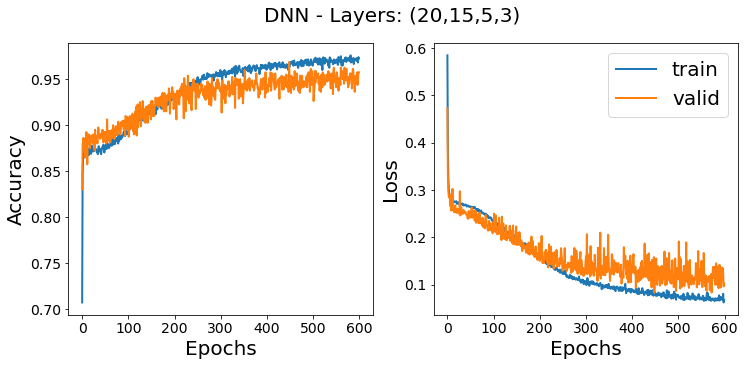

In [345]:
fig,AX=plt.subplots(1,2,figsize=(12,5))

ax=AX[0]
ax.plot(fit_simple2.history['accuracy'],label="train", lw=2)
ax.plot(fit_simple2.history['val_accuracy'],label="valid", lw=2)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
ax=AX[1]
ax.plot(fit_simple2.history['loss'],label="train", lw=2)
ax.plot(fit_simple2.history['val_loss'],label="valid", lw=2)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend(fontsize=20)
plt.suptitle('DNN - Layers: (20,15,5,3)', fontsize=20)
plt.savefig('./Graphs/training_curve_simple_DNN', dpi=300)


# complex model performance on completely sampled space

44 1936
[15. 15.]
[[8.3573342e-28]
 [2.9834949e-27]
 [9.0919678e-27]
 ...
 [4.8647876e-16]
 [1.0299739e-15]
 [5.6078653e-16]]
(1936, 1)
<class 'numpy.ndarray'>


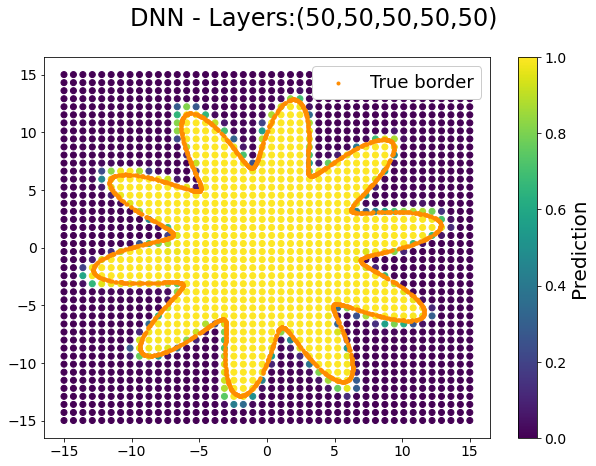

In [346]:
#Doing a prediction on a grid of points

dX = 2 #number of dimensions of the data
LG = int(np.sqrt(N/2))
x1 = np.linspace(-15,15,LG)
x2 = np.linspace(-15,15,LG)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(x1[j],x2[i])
        k=k+1
print(len(x1),len(grid))
print(grid[-1])

grid_r = Rescale(grid)

pred = complex_model.predict(grid_r)
print(pred)
print(np.shape(pred))
print(type(pred))

def boundaries():    
    angles = np.pi * np.random.uniform(0, 2, size=3000)
    R = 10 #radius of the circle for case 3
    k = 10 # periods of the 
    C = 3 # magnitude of the sinusoide
    
    x_circle = R * np.cos(angles)
    y_circle = R * np.sin(angles)
    
    R_new = R + C *np.sin(k * np.arctan(y_circle/x_circle))


    x_new = R_new * np.cos(angles)
    y_new = R_new * np.sin(angles)

    plt.scatter(x_new, y_new, marker='.', label='True border', color='darkorange')
    

fig,ax=plt.subplots(1,1,figsize=(10,7))
fig.suptitle('DNN - Layers:(50,50,50,50,50)', fontsize=24)


ax.scatter(grid[:,0],grid[:,1],c=pred)
#ax.set_title('Predicted Lables of Test Data')

boundaries()
plt.colorbar().set_label(label='Prediction',size=20)

plt.legend(fontsize=18, framealpha=1)

#plt.savefig('./Graphs/grid_prediction_complex_model', dpi=300)

In [347]:
complex_model.evaluate(x_valid, y_valid)

25/25 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9500


[0.15236015617847443, 0.949999988079071]

# simple model performance on completely sampled space

44 1936
[15. 15.]
[[8.1046830e-14]
 [4.6734513e-13]
 [2.4601597e-12]
 ...
 [2.2088166e-07]
 [6.6614859e-07]
 [4.3522268e-06]]
(1936, 1)
<class 'numpy.ndarray'>


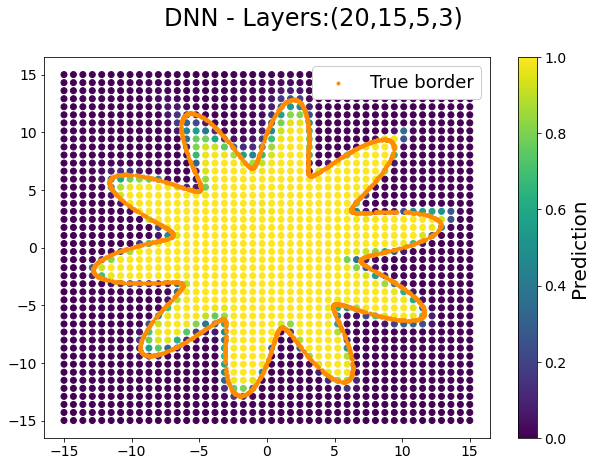

In [348]:
#Doing a prediction on a grid of points

dX = 2 #number of dimensions of the data
LG = int(np.sqrt(N/2))
x1 = np.linspace(-15,15,LG)
x2 = np.linspace(-15,15,LG)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(x1[j],x2[i])
        k=k+1
print(len(x1),len(grid))
print(grid[-1])

grid_r = Rescale(grid)

pred = simple_model2.predict(grid_r)
print(pred)
print(np.shape(pred))
print(type(pred))

def boundaries():    
    angles = np.pi * np.random.uniform(0, 2, size=3000)
    R = 10 #radius of the circle for case 3
    k = 10 # periods of the 
    C = 3 # magnitude of the sinusoide
    
    x_circle = R * np.cos(angles)
    y_circle = R * np.sin(angles)
    
    R_new = R + C *np.sin(k * np.arctan(y_circle/x_circle))


    x_new = R_new * np.cos(angles)
    y_new = R_new * np.sin(angles)

    plt.scatter(x_new, y_new, marker='.', label='True border', color='darkorange')
    

fig,ax=plt.subplots(1,1,figsize=(10,7))
fig.suptitle('DNN - Layers:(20,15,5,3)', fontsize=24)


ax.scatter(grid[:,0],grid[:,1],c=pred)
#ax.set_title('Predicted Lables of Test Data')

boundaries()
plt.colorbar().set_label(label='Prediction',size=20)

plt.legend(fontsize=18, framealpha=1)

#plt.savefig('./Graphs/grid_prediction_simple_model', dpi=300)

In [349]:
simple_model2.evaluate(x_valid, y_valid)

25/25 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9575


[0.10215156525373459, 0.9574999809265137]

# Pruning last layer of complex DNN
We study the accuracy of the network as a function of the number of active network in the last layer of the coplex DNN

In [369]:
import pandas as pd

In [400]:
complex_weights = np.array(complex_model.get_weights())
pruning_rates = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5, 0.55,0.6,0.65,0.7, 0.75,0.8]

results = dict()

n_experiment = 100

for j in range(n_experiment):
    print(j)
    for pruning_rate in pruning_rates:

        weights = complex_weights.copy()
        for i in range(10,11,2): #prune the layers
            weight = weights[i].copy()

            weight_flat  = weight.flatten()
            
            indeces = np.random.choice(weight_flat.shape[0], int(pruning_rate * weight_flat.shape[0]), replace=False)
            weight_flat[indeces] = 0
            weights[i] = weight_flat.reshape(weight.shape)
            #complex_model.layers[3].get_weights()[0]
        pruned_model = keras.models.clone_model(complex_model)
        pruned_model.compile(loss='binary_crossentropy',  #tf.keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
        pruned_model.set_weights(weights)

        if pruning_rate in results.keys():
            l = results[pruning_rate]
            l.append(pruned_model.evaluate(x_valid, y_valid))
            results[pruning_rate] = l

        else:
            results[pruning_rate] = [pruned_model.evaluate(x_valid, y_valid)]


/tmp/ipykernel_13276/2752751788.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  complex_weights = np.array(complex_model.get_weights())


0
25/25 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7649
1
25/25 [==============================] - 0s 965us/step - loss: 0.7882 - accuracy: 0.7420
2
25/25 [==============================] - 0s 899us/step - loss: 0.6993 - accuracy: 0.7317
3
25/25 [==============================] - 0s 939us/step - loss: 0.5671 - accuracy: 0.7908
4
25/25 [==============================] - 0s 907us/step - loss: 1.0322 - accuracy: 0.6214
5
25/25 [==============================] - 0s 989us/step - loss: 1.2169 - accuracy: 0.6836
6
25/25 [==============================] - 0s 886us/step - loss: 1.2591 - accuracy: 0.6499
7
25/25 [==============================] - 0s 860us/step - loss: 1.4693 - accuracy: 0.6240
8
25/25 [==============================] - 0s 881us/step - loss: 0.4070 - accuracy: 0.8446
9
25/25 [==============================] - 0s 1ms/step - loss: 1.2318 - accuracy: 0.5475
10
25/25 [==============================] - 0s 916us/step - loss: 0.7474 - accuracy: 0.7890
11

25/25 [==============================] - 0s 930us/step - loss: 1.2888 - accuracy: 0.6746
12
25/25 [==============================] - 0s 1ms/step - loss: 0.9695 - accuracy: 0.7724
13
25/25 [==============================] - 0s 1ms/step - loss: 0.9209 - accuracy: 0.7435
14
25/25 [==============================] - 0s 1ms/step - loss: 1.1131 - accuracy: 0.6134
15
25/25 [==============================] - 0s 1ms/step - loss: 1.9620 - accuracy: 0.4910
16
25/25 [==============================] - 0s 904us/step - loss: 1.2437 - accuracy: 0.6230
17
25/25 [==============================] - 0s 910us/step - loss: 1.0196 - accuracy: 0.6533
18
25/25 [==============================] - 0s 1ms/step - loss: 1.6618 - accuracy: 0.5548
19
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7679
20
25/25 [==============================] - 0s 917us/step - loss: 0.7349 - accuracy: 0.7617
21
25/25 [==============================] - 0s 1ms/step - loss: 1.5423 - accuracy: 0.7024
22
25

25/25 [==============================] - 0s 1ms/step - loss: 1.8823 - accuracy: 0.6072
24
25/25 [==============================] - 0s 978us/step - loss: 0.8685 - accuracy: 0.7499
25
25/25 [==============================] - 0s 901us/step - loss: 1.2162 - accuracy: 0.7161
26
25/25 [==============================] - 0s 947us/step - loss: 0.4380 - accuracy: 0.8213
27
25/25 [==============================] - 0s 1ms/step - loss: 1.5568 - accuracy: 0.5899
28
25/25 [==============================] - 0s 910us/step - loss: 0.9383 - accuracy: 0.5971
29
25/25 [==============================] - 0s 919us/step - loss: 0.6695 - accuracy: 0.7932
30
25/25 [==============================] - 0s 955us/step - loss: 0.6782 - accuracy: 0.7936
31
25/25 [==============================] - 0s 937us/step - loss: 1.1479 - accuracy: 0.6164
32
25/25 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8115
33
25/25 [==============================] - 0s 982us/step - loss: 0.5784 - accuracy: 0.79

25/25 [==============================] - 0s 918us/step - loss: 0.6103 - accuracy: 0.7953
35
25/25 [==============================] - 0s 1ms/step - loss: 0.7402 - accuracy: 0.6969
36
25/25 [==============================] - 0s 1ms/step - loss: 2.4083 - accuracy: 0.6222
37
25/25 [==============================] - 0s 915us/step - loss: 0.4321 - accuracy: 0.8498
38
25/25 [==============================] - 0s 1ms/step - loss: 0.7596 - accuracy: 0.7811
39
25/25 [==============================] - 0s 951us/step - loss: 0.7304 - accuracy: 0.7602
40
25/25 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7893
41
25/25 [==============================] - 0s 961us/step - loss: 2.6725 - accuracy: 0.4292
42
25/25 [==============================] - 0s 942us/step - loss: 0.5370 - accuracy: 0.8178
43
25/25 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7458
44
25/25 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8355
45


25/25 [==============================] - 0s 976us/step - loss: 1.4210 - accuracy: 0.5756
47
25/25 [==============================] - 0s 974us/step - loss: 0.9543 - accuracy: 0.6802
48
25/25 [==============================] - 0s 991us/step - loss: 1.4030 - accuracy: 0.6320
49
25/25 [==============================] - 0s 1ms/step - loss: 0.7817 - accuracy: 0.7967
50
25/25 [==============================] - 0s 1ms/step - loss: 1.4557 - accuracy: 0.5580
51
25/25 [==============================] - 0s 970us/step - loss: 0.6551 - accuracy: 0.7150
52
25/25 [==============================] - 0s 994us/step - loss: 0.8356 - accuracy: 0.7002
53
25/25 [==============================] - 0s 1ms/step - loss: 1.5675 - accuracy: 0.6485
54
25/25 [==============================] - 0s 952us/step - loss: 0.8265 - accuracy: 0.7730
55
25/25 [==============================] - 0s 1ms/step - loss: 0.8385 - accuracy: 0.7225
56
25/25 [==============================] - 0s 957us/step - loss: 0.8729 - accuracy: 0.6810

25/25 [==============================] - 0s 1ms/step - loss: 1.4033 - accuracy: 0.6468
58
25/25 [==============================] - 0s 1ms/step - loss: 2.5203 - accuracy: 0.4496
59
25/25 [==============================] - 0s 1ms/step - loss: 1.6676 - accuracy: 0.5563
60
25/25 [==============================] - 0s 950us/step - loss: 0.9733 - accuracy: 0.6450
61
25/25 [==============================] - 0s 1ms/step - loss: 2.2230 - accuracy: 0.5636
62
25/25 [==============================] - 0s 1ms/step - loss: 0.8866 - accuracy: 0.7314
63
25/25 [==============================] - 0s 1ms/step - loss: 1.4331 - accuracy: 0.6240
64
25/25 [==============================] - 0s 946us/step - loss: 2.4000 - accuracy: 0.5798
65
25/25 [==============================] - 0s 934us/step - loss: 0.9767 - accuracy: 0.7698
66
25/25 [==============================] - 0s 1ms/step - loss: 1.3661 - accuracy: 0.5894
67
25/25 [==============================] - 0s 898us/step - loss: 0.8557 - accuracy: 0.7673
68
25

25/25 [==============================] - 0s 891us/step - loss: 0.8152 - accuracy: 0.6889
70
25/25 [==============================] - 0s 957us/step - loss: 1.8525 - accuracy: 0.6355
71
25/25 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8836
72
25/25 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8388
73
25/25 [==============================] - 0s 960us/step - loss: 0.2682 - accuracy: 0.8888
74
25/25 [==============================] - 0s 857us/step - loss: 2.6795 - accuracy: 0.3870
75
25/25 [==============================] - 0s 1ms/step - loss: 2.0607 - accuracy: 0.4078
76
25/25 [==============================] - 0s 1ms/step - loss: 1.5071 - accuracy: 0.5089
77
25/25 [==============================] - 0s 982us/step - loss: 1.6921 - accuracy: 0.6493
78
25/25 [==============================] - 0s 1ms/step - loss: 1.0277 - accuracy: 0.6707
79
25/25 [==============================] - 0s 999us/step - loss: 0.8019 - accuracy: 0.7066
8

25/25 [==============================] - 0s 975us/step - loss: 1.1459 - accuracy: 0.6674
81
25/25 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.6458
82
25/25 [==============================] - 0s 898us/step - loss: 0.9744 - accuracy: 0.7058
83
25/25 [==============================] - 0s 997us/step - loss: 1.0972 - accuracy: 0.5130
84
25/25 [==============================] - 0s 1ms/step - loss: 1.2026 - accuracy: 0.6485
85
25/25 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.7376
86
25/25 [==============================] - 0s 933us/step - loss: 0.6141 - accuracy: 0.8370


25/25 [==============================] - 0s 963us/step - loss: 1.1988 - accuracy: 0.5790
87
25/25 [==============================] - 0s 984us/step - loss: 2.9132 - accuracy: 0.4577
88
25/25 [==============================] - 0s 980us/step - loss: 1.8509 - accuracy: 0.5668
89
25/25 [==============================] - 0s 871us/step - loss: 0.3637 - accuracy: 0.8790
90
25/25 [==============================] - 0s 926us/step - loss: 1.7438 - accuracy: 0.5709
91
25/25 [==============================] - 0s 929us/step - loss: 0.6496 - accuracy: 0.7593
92
25/25 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.8132
93
25/25 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8402
94
25/25 [==============================] - 0s 1ms/step - loss: 1.2035 - accuracy: 0.6310
95
25/25 [==============================] - 0s 968us/step - loss: 1.8513 - accuracy: 0.6082
96
25/25 [==============================] - 0s 963us/step - loss: 0.6180 - accuracy: 0.73

25/25 [==============================] - 0s 947us/step - loss: 1.8977 - accuracy: 0.5816
98
25/25 [==============================] - 0s 964us/step - loss: 0.4543 - accuracy: 0.8211
99
25/25 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8768


In [401]:
results_df = pd.DataFrame(results)

In [402]:
accuracy_df = pd.DataFrame()

for col in results_df.columns:
    accuracy_df[col] = results_df[col].apply(lambda x : x[1])

In [434]:
accuracy_df

0.05     0.10     0.15     0.20     0.25     0.30     0.35     0.40  \
0   0.95375  0.95000  0.91500  0.91375  0.88500  0.91000  0.91250  0.86500   
1   0.95750  0.92750  0.95000  0.83125  0.91750  0.88875  0.87625  0.92750   
2   0.95625  0.94750  0.95375  0.86625  0.90625  0.95750  0.89750  0.91000   
3   0.96125  0.91750  0.93125  0.91000  0.88875  0.92000  0.88375  0.84875   
4   0.94750  0.93250  0.91125  0.91500  0.93750  0.86500  0.87750  0.87875   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.94500  0.90250  0.92125  0.95250  0.92875  0.87375  0.91250  0.85500   
96  0.93875  0.94250  0.92375  0.92125  0.90625  0.90250  0.88000  0.85000   
97  0.94500  0.93125  0.91750  0.92875  0.87875  0.88500  0.94000  0.89375   
98  0.94875  0.94250  0.92875  0.84875  0.93500  0.87750  0.86250  0.81375   
99  0.94250  0.94875  0.92625  0.89375  0.92375  0.94750  0.90750  0.82125   

       0.45     0.50     0.55     0.60     0.65     0.70     0.75     0.80  
0   0.90875  0.90125  0.83625  0.73250  0.59500  0.72000  0.70000  0.74375  
1   0.87625  0.80250  0.81875  0.81250  0.57125  0.67000  0.70500  0.72375  
2   0.91875  0.87250  0.74750  0.68750  0.74875  0.80000  0.62625  0.72875  
3   0.86250  0.81375  0.65875  0.80250  0.74750  0.84375  0.73250  0.78125  
4   0.82625  0.80000  0.77375  0.76750  0.81625  0.81000  0.60125  0.61875  
..      ...      ...      ...      ...      ...      ...      ...      ...  
95  0.87875  0.85125  0.76625  0.77500  0.74625  0.79000  0.75875  0.60000  
96  0.88250  0.83375  0.85875  0.85250  0.77250  0.79750  0.69500  0.73250  
97  0.78000  0.82375  0.76500  0.78125  0.83375  0.69875  0.76500  0.56875  
98  0.79500  0.78500  0.80500  0.79125  0.84375  0.68875  0.43500  0.80375  
99  0.72875  0.88125  0.85625  0.88375  0.84000  0.57875  0.68500  0.85500  

[100 rows x 16 columns]

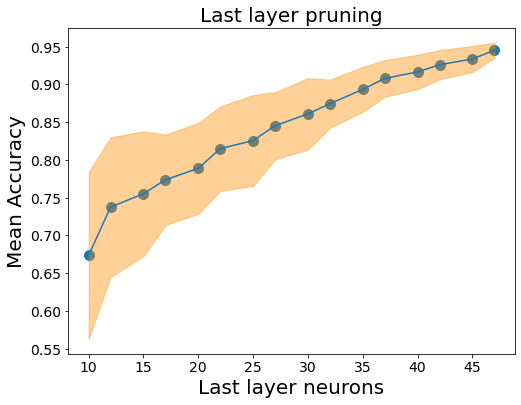

In [433]:
mean = accuracy_df.mean()
std = accuracy_df.std()

plt.figure(figsize=(8,6))
#plt.title('Last layer pruning', fontsize=18)
plt.title('Last layer pruning', fontsize=20)
plt.xlabel('Last layer neurons', fontsize=20)
plt.ylabel('Mean Accuracy', fontsize=20)
plt.plot((50 - np.array(pruning_rates)*50).astype(int), accuracy_df.mean())
plt.scatter((50 - np.array(pruning_rates)*50).astype(int), accuracy_df.mean(), s=100)
plt.fill_between((50 - np.array(pruning_rates)*50).astype(int), mean-std, mean+std, alpha=0.4, color='darkorange')
plt.savefig('./Graphs/pruning', dpi=300)

In [353]:
complex_model.evaluate(x_valid,y_valid)

25/25 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9500


[0.15236015617847443, 0.949999988079071]

# It seams to be a linear relation so we perform a linear regression

In [455]:
y_data = np.array(mean)
x_data = np.array(mean.index)
x_data = 50 - x_data * 50 #number of neurons in the layer
x_data = x_data.astype('int')

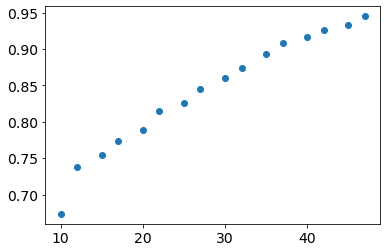

In [456]:
plt.scatter(x_data, y_data)

In [497]:
linfit = linreg().fit(X=x_data.reshape(-1,1),y=y_data, sample_weight=1/np.array(std)**2)

print('Score: ',linfit.score(x_data.reshape(-1,1),y_data, sample_weight=1/np.array(std)**2))

print('The slope is :', linfit.coef_[0])
print('The intercept is :', linfit.intercept_)

t = np.linspace(10,50,100)
y_fit = linfit.predict(t.reshape(-1,1))

Score:  0.9670928571465777
The slope is : 0.005404891222834648
The intercept is : 0.6945159819291408


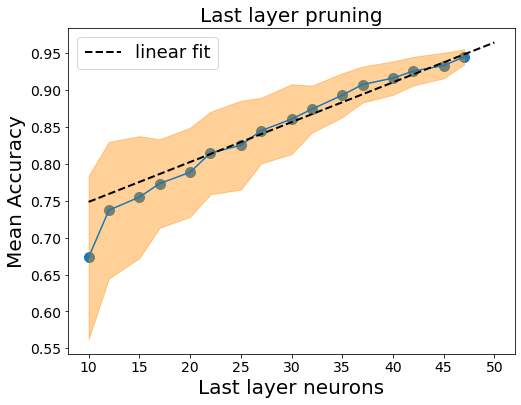

In [495]:
mean = accuracy_df.mean()
std = accuracy_df.std()

plt.figure(figsize=(8,6))

#plt.title('Last layer pruning', fontsize=18)
plt.title('Last layer pruning', fontsize=20)
plt.xlabel('Last layer neurons', fontsize=20)
plt.ylabel('Mean Accuracy', fontsize=20)
plt.plot((50 - np.array(pruning_rates)*50).astype(int), accuracy_df.mean())
plt.scatter((50 - np.array(pruning_rates)*50).astype(int), accuracy_df.mean(), s=100)
plt.fill_between((50 - np.array(pruning_rates)*50).astype(int), mean-std, mean+std, alpha=0.4, color='darkorange')



#plot linear fit
plt.plot(t, y_fit, label='linear fit', lw=2, color='black', linestyle='--')
plt.legend(fontsize=18)


plt.savefig('./Graphs/pruning_fit', dpi=300)